# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import math
from geopy.geocoders import Nominatim
import re

# Versiones de librerías
print("".join(f"{x[0]}:{x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ("Matplotlib",matplotlib.__version__),
    ("SKlearn",sklearn.__version__),
    ("Seaborn",sns.__version__)
]))

Pandas:1.3.3
Numpy:1.19.2
Matplotlib:3.2.0
SKlearn:0.24.2
Seaborn:0.11.0



# Load dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# print(df.info())
# df.describe()

In [4]:
def display_dataset_distributions(dataset,bins=10):
    fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
    [x.title.set_size(14) for x in fig.ravel()]
    plt.tight_layout()
    plt.show()
# display_dataset_distributions(df)

In [5]:
# fig = plt.figure(figsize=(15,5)), sns.distplot(df['Sunshine'])
# fig = plt.figure(figsize=(15,5)), plt.scatter(1/df['Sunshine'],df['Cloud3pm'])
# fig = plt.figure(figsize=(25,5)), df.boxplot()

# Add RainfallTomorrow

In [6]:
df['RainfallTomorrow']=df['Rainfall'].shift(-1)
df['RainfallYesterday']=df['Rainfall'].shift(1)

# Delete the first and the last element of each city
remove_index = []
for l in pd.unique(df['Location']):
    remove_index.append(df.index[df['Location'] == l][0])
    remove_index.append(df.index[df['Location'] == l][-1])

df.drop(df.index[np.array(remove_index)],inplace=True)
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,RainfallYesterday
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0,0.6
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0,0.0


# Split into Train Test

In [7]:
df = df[df['RainTomorrow'].notna()]
# df = df[df['RainfallTomorrow'].notna()]
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.448260
MaxTemp               0.225889
Rainfall              0.989409
Evaporation          42.780338
Sunshine             47.686570
WindGustDir           6.560642
WindGustSpeed         6.518419
WindDir9am            7.041976
WindDir3pm            2.655079
WindSpeed9am          0.947891
WindSpeed3pm          1.847929
Humidity9am           1.246965
Humidity3pm           2.536857
Pressure9am           9.855389
Pressure3pm           9.831463
Cloud9am             37.735477
Cloud3pm             40.151297
Temp9am               0.635446
Temp3pm               1.915485
RainToday             0.989409
RainTomorrow          0.000000
RainfallTomorrow      0.000000
RainfallYesterday     1.408817
dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['RainTomorrow','RainfallTomorrow'], axis=1),
    df['RainTomorrow'],
    test_size=0.15,
    random_state=0)

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("\ny_train = ")
print(y_train)

X_train.shape, X_test.shape = 
(120789, 23) (21316, 23)

y_train = 
66916     Yes
118862     No
110872    Yes
52439      No
101685     No
         ... 
43232      No
100270     No
98558      No
120958     No
44815      No
Name: RainTomorrow, Length: 120789, dtype: object


# Drop columns

In [9]:
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.448260
MaxTemp               0.225889
Rainfall              0.989409
Evaporation          42.780338
Sunshine             47.686570
WindGustDir           6.560642
WindGustSpeed         6.518419
WindDir9am            7.041976
WindDir3pm            2.655079
WindSpeed9am          0.947891
WindSpeed3pm          1.847929
Humidity9am           1.246965
Humidity3pm           2.536857
Pressure9am           9.855389
Pressure3pm           9.831463
Cloud9am             37.735477
Cloud3pm             40.151297
Temp9am               0.635446
Temp3pm               1.915485
RainToday             0.989409
RainTomorrow          0.000000
RainfallTomorrow      0.000000
RainfallYesterday     1.408817
dtype: float64


In [10]:
X_train.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],axis=1,inplace=True)
drop_columns = []

# Variable Encoding

## Wind Direction

In [11]:
y_train.replace({"No":0,"Yes":1},inplace=True)
X_train.replace({"No":0,"Yes":1},inplace=True)

In [12]:
labels = np.array(pd.unique(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].values.ravel('K')),dtype=np.str)
labels = np.delete(labels, np.argwhere(labels=='nan'))
print(labels)

['WNW' 'WSW' 'NE' 'W' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


![cardenal_points](./cardenal_points.png)

In [13]:
# def wind_dir_circular_representation(dir):
#     return np.cos(2 * np.pi * (dir/16)), np.sin(2 * np.pi * (dir/16))

windDirDic = {
    "E": 0,
    "ENE": 1,
    "NE": 2,
    "NNE": 3,
    "N": 4,
    "NNW": 5,
    "NW": 6,
    "WNW": 7,
    "W": 8,
    "WSW": 9,
    "SW": 10,
    "SSW": 11,
    "S": 12,
    "SSE": 13,
    "SE": 14,
    "ESE": 15,
}

X_train.replace(windDirDic,inplace=True)

X_train.head(3)

# # Cyclic encoding is implemented after imputation
# wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
# for wd in wind_dir_colums:
#     X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
#     X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

# # X_train.drop(wind_dir_colums,axis=1, inplace=True)
# drop_columns+=wind_dir_colums

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainfallYesterday
66916,MelbourneAirport,6.7,14.2,3.2,9.0,57.0,8.0,9.0,24.0,39.0,80.0,70.0,1007.0,1009.3,11.6,13.0,1.0,20.4
118862,PerthAirport,12.7,20.7,3.0,8.0,24.0,4.0,6.0,9.0,13.0,90.0,54.0,1026.2,1023.8,14.3,19.9,1.0,1.4
110872,Albany,12.5,16.1,0.2,NaN,NaN,0.0,1.0,30.0,19.0,73.0,76.0,1017.4,1014.6,13.5,15.0,0.0,0.0


## Location

In [14]:
def get_name_with_space(loc):
    return re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', loc)

In [15]:
locations = np.array(X_train['Location'].unique(),dtype=np.str)
locations = [get_name_with_space(loc) for loc in locations]

locations_coord = []
geocoder = Nominatim(user_agent = '_')
for loc in locations:
    location = geocoder.geocode(loc+' Australia')
    if location:
        lon=location.longitude
        lat=location.latitude
        locations_coord.append({"name":loc,"lon":lon,"lat":lat})
    else:
         raise Exception('no coordinates could be found for '+str(loc))

locations_df = pd.DataFrame.from_dict(locations_coord)

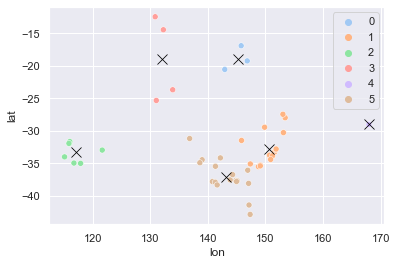

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
X = locations_df.drop(['name'],axis=1)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
cluster = kmeans.labels_
fig = plt.figure()
sns.scatterplot(x='lon',y='lat',data=locations_df,hue=cluster,palette='pastel')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker="x",s=100,color="0")

In [17]:
locations_df["type"] = cluster
locations_df

,name,lon,lat,type
0,Melbourne Airport,144.833481,-37.667111,5
1,Perth Airport,115.967608,-31.940610,2
2,Albany,117.883608,-35.024782,2
3,Mount Ginini,148.772635,-35.529720,1
4,Mount Gambier,140.782007,-37.824670,5
5,Sale,147.064790,-38.105036,5
6,Moree,149.840715,-29.461720,1
7,Ballarat,143.860565,-37.562303,5
8,Pearce RAAF,116.017544,-31.673960,2
9,Cobar,145.834444,-31.498333,1


In [18]:
X_train['LocationType'] = X_train.apply(
    lambda row: int(locations_df.loc[locations_df['name'] == get_name_with_space(row['Location'])].filter(['type']).values[0]), 
    axis=1)
    
print("Unique values in LocationType = "+str(pd.unique(X_train['LocationType'])))

KeyboardInterrupt: 

In [ ]:
y = X_train.LocationType.values
onehotencoder = OneHotEncoder(categories='auto',sparse=False)
y = onehotencoder.fit_transform(y.reshape(-1,1))
for i in range(y.shape[1]-1):
    X_train['LocationType_'+str(i)]=y[:,i]

# X_train.drop(['Location','LocationType'], axis=1, inplace=True)
drop_columns+=['Location','LocationType']
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Temp9am,Temp3pm,RainToday,RainfallYesterday,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4
66916,MelbourneAirport,6.7,14.2,3.2,9.0,57.0,8.0,9.0,24.0,39.0,...,11.6,13.0,1.0,20.4,5,0.0,0.0,0.0,0.0,0.0
118862,PerthAirport,12.7,20.7,3.0,8.0,24.0,4.0,6.0,9.0,13.0,...,14.3,19.9,1.0,1.4,2,0.0,0.0,1.0,0.0,0.0
110872,Albany,12.5,16.1,0.2,NaN,NaN,0.0,1.0,30.0,19.0,...,13.5,15.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
52439,MountGinini,6.2,21.5,0.0,8.0,39.0,9.0,10.0,17.0,19.0,...,12.9,20.9,0.0,NaN,1,0.0,1.0,0.0,0.0,0.0
101685,MountGambier,8.7,24.2,0.0,14.0,39.0,14.0,11.0,20.0,20.0,...,16.8,23.1,0.0,0.0,5,0.0,0.0,0.0,0.0,0.0


# Feature Selection / New Features

(<matplotlib.axes._subplots.AxesSubplot at 0x2b024c74e20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b024c74e20>)

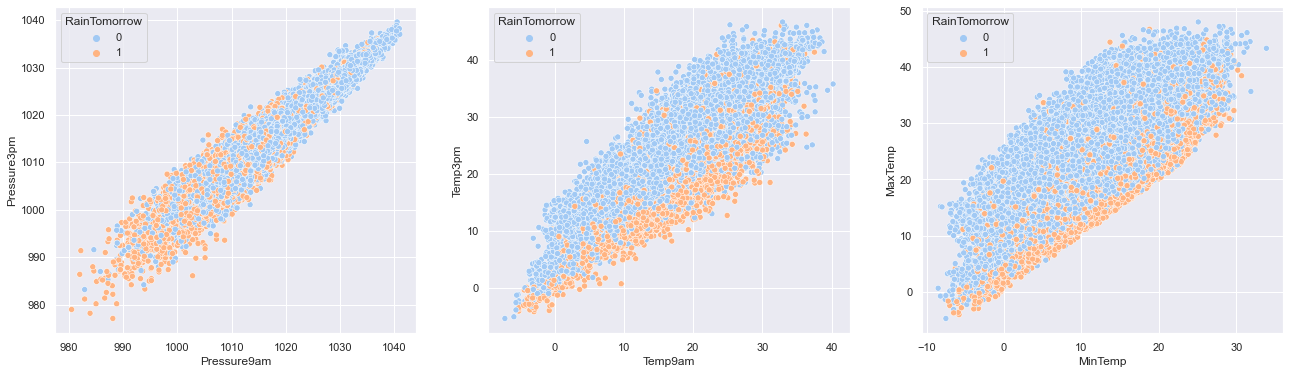

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(22,6))

plt.subplot(1,3,1), sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,2), sns.scatterplot(x='Temp9am',y='Temp3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,3), sns.scatterplot(x='MinTemp',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)

In [ ]:
# Pressures
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Pressure3pm.fillna(X_train.Pressure9am, inplace=True)
X_train.Pressure9am.fillna(X_train.Pressure3pm, inplace=True)
press_mean = (X_train['Pressure3pm'] + X_train['Pressure9am'])/2
X_train['PressureMean'] = press_mean
X_train.drop('Pressure3pm', inplace=True, axis=1)
X_train.drop('Pressure9am', inplace=True, axis=1)

# Temperatures
temp_diff = X_train['Temp3pm'] - X_train['Temp9am']
X_train['TempDiff'] = temp_diff
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Temp3pm.fillna(X_train.Temp9am, inplace=True)
X_train.Temp9am.fillna(X_train.Temp3pm, inplace=True)
temp_mean = (X_train['Temp3pm'] + X_train['Temp9am'])/2
X_train['TempMean'] = temp_mean
X_train.drop('Temp3pm', inplace=True, axis=1)
X_train.drop('Temp9am', inplace=True, axis=1)

# Temperatures max-min
max_temp_diff = X_train['MaxTemp'] - X_train['MinTemp']
X_train['TempMaxDiff'] = max_temp_diff
X_train.drop('MinTemp', inplace=True, axis=1)

Percentage of NaN:
Location             0.000000
MaxTemp              0.227670
Rainfall             1.001747
WindGustDir          6.552749
WindGustSpeed        6.509699
WindDir9am           7.043688
WindDir3pm           2.629379
WindSpeed9am         0.937999
WindSpeed3pm         1.837088
Humidity9am          1.227761
Humidity3pm          2.519269
RainToday            1.001747
RainfallYesterday    1.428110
LocationType         0.000000
LocationType_0       0.000000
LocationType_1       0.000000
LocationType_2       0.000000
LocationType_3       0.000000
LocationType_4       0.000000
PressureMean         9.697903
TempDiff             2.274214
TempMean             0.234293
TempMaxDiff          0.601048
dtype: float64


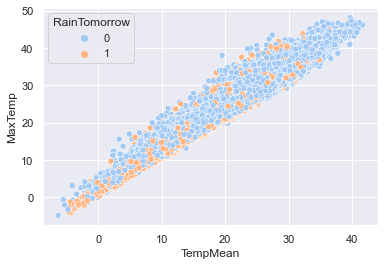

In [ ]:
sns.scatterplot(x='TempMean',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

In [ ]:
X_train.drop('MaxTemp', inplace=True, axis=1)
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff
66916,MelbourneAirport,3.2,9.0,57.0,8.0,9.0,24.0,39.0,80.0,70.0,...,5,0.0,0.0,0.0,0.0,0.0,1008.15,1.4,12.30,7.5
118862,PerthAirport,3.0,8.0,24.0,4.0,6.0,9.0,13.0,90.0,54.0,...,2,0.0,0.0,1.0,0.0,0.0,1025.00,5.6,17.10,8.0
110872,Albany,0.2,NaN,NaN,0.0,1.0,30.0,19.0,73.0,76.0,...,2,0.0,0.0,1.0,0.0,0.0,1016.00,1.5,14.25,3.6
52439,MountGinini,0.0,8.0,39.0,9.0,10.0,17.0,19.0,48.0,30.0,...,1,0.0,1.0,0.0,0.0,0.0,NaN,8.0,16.90,15.3
101685,MountGambier,0.0,14.0,39.0,14.0,11.0,20.0,20.0,56.0,41.0,...,5,0.0,0.0,0.0,0.0,0.0,1024.75,6.3,19.95,15.5


(<matplotlib.axes._subplots.AxesSubplot at 0x2b027be9dc0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x2b027be9dc0>)

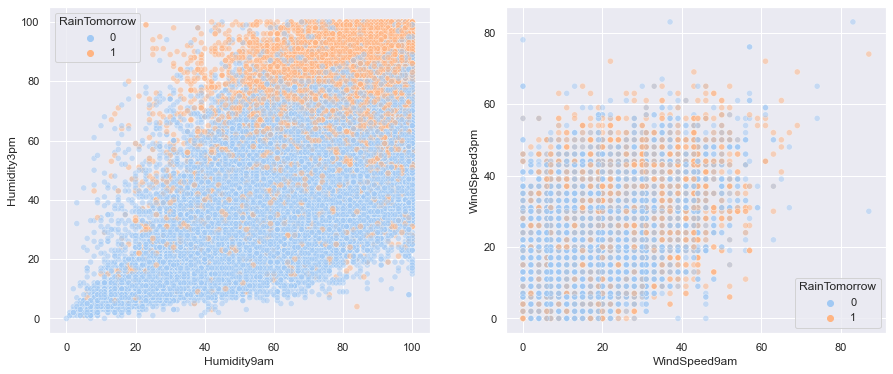

In [ ]:
fig, axs = plt.subplots(1, 3,figsize=(15,6))

plt.subplot(1,2,1), sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue=y_train,palette='pastel',alpha = .5, data=X_train)
plt.subplot(1,2,2), sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',hue=y_train,palette='pastel',alpha = .5,data=X_train)

In [ ]:
# '''*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*'''
# ''' Check if that makes sense '''
# hum_diff = df['Humidity3pm'] - df['Humidity9am']
# hum_mean = (df['Humidity3pm'] + df['Humidity9am'])/2
# df['HumidityDiff'] = hum_diff
# df['HumidityMean'] = hum_mean

# windSpeed_diff = df['WindSpeed3pm'] - df['WindSpeed9am']
# windSpeed_mean = (df['WindSpeed3pm'] + df['WindSpeed9am'])/2
# df['WindSpeedDiff'] = windSpeed_diff
# df['WindSpeedMean'] = windSpeed_mean

# X_train.drop('Humidity3pm', inplace=True, axis=1)
# X_train.drop('Humidity9am', inplace=True, axis=1)
# X_train.drop('WindSpeed3pm', inplace=True, axis=1)
# X_train.drop('WindSpeed9am', inplace=True, axis=1)
# ''' Check if that makes sense '''


# X_train.head()

# Outliers

In [ ]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)
    
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

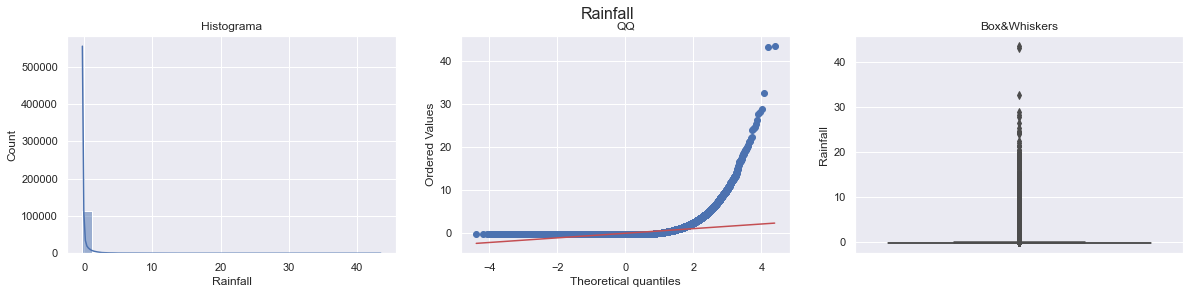

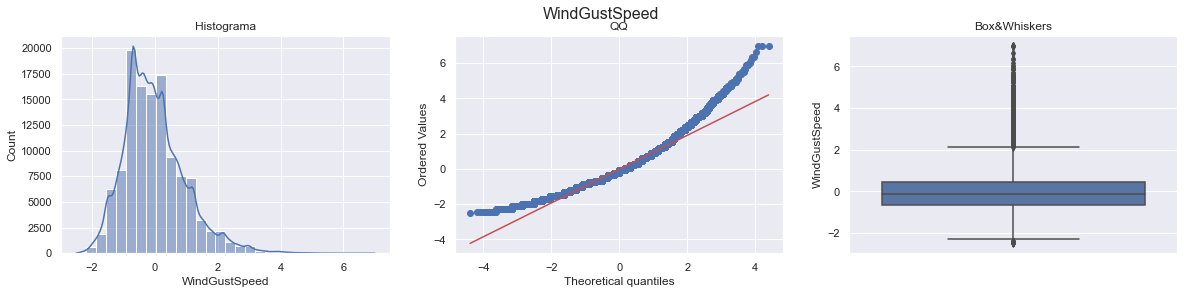

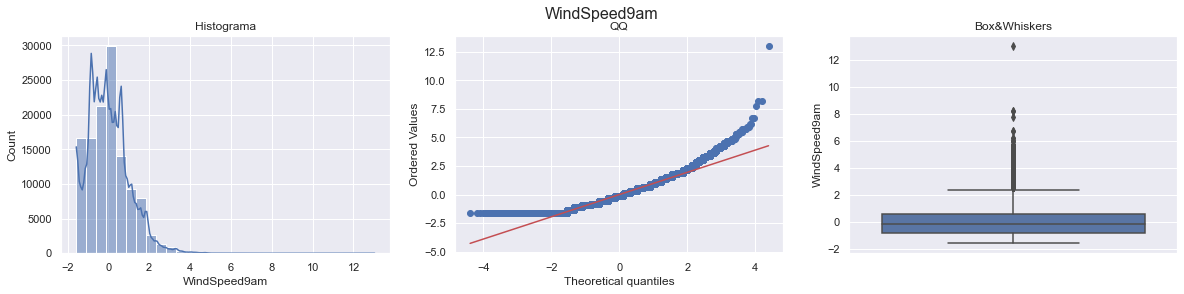

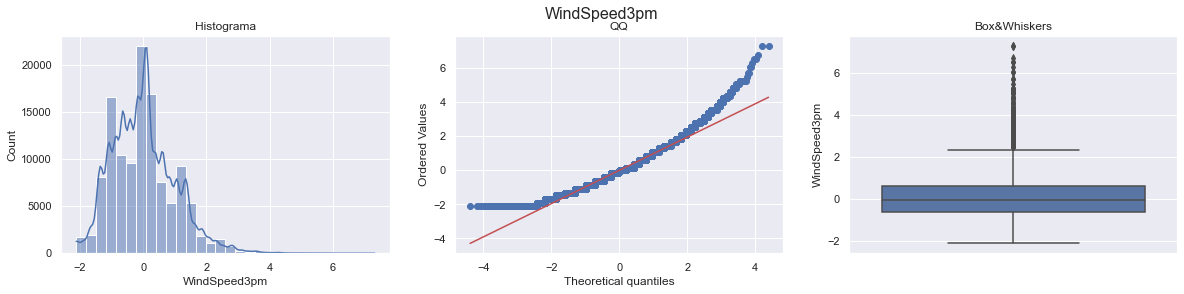

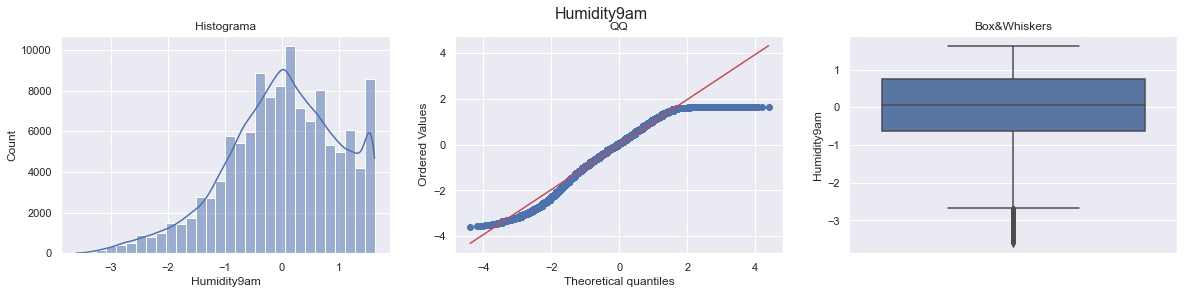

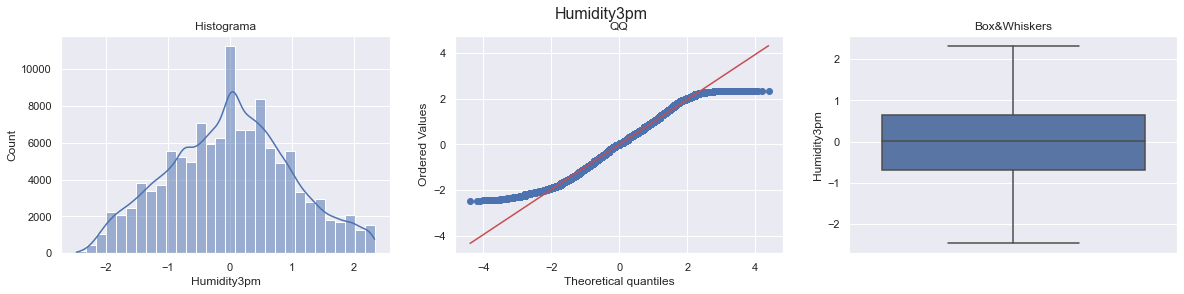

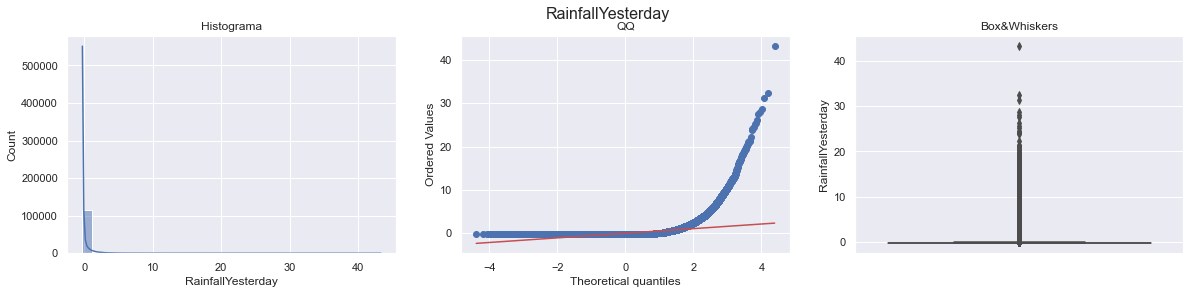

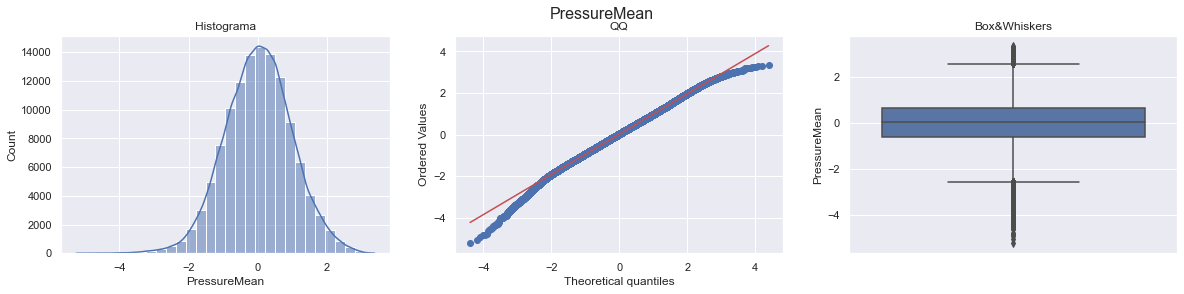

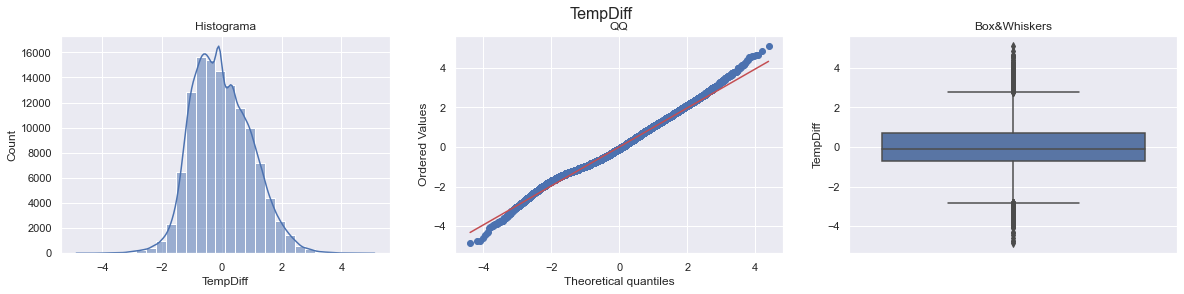

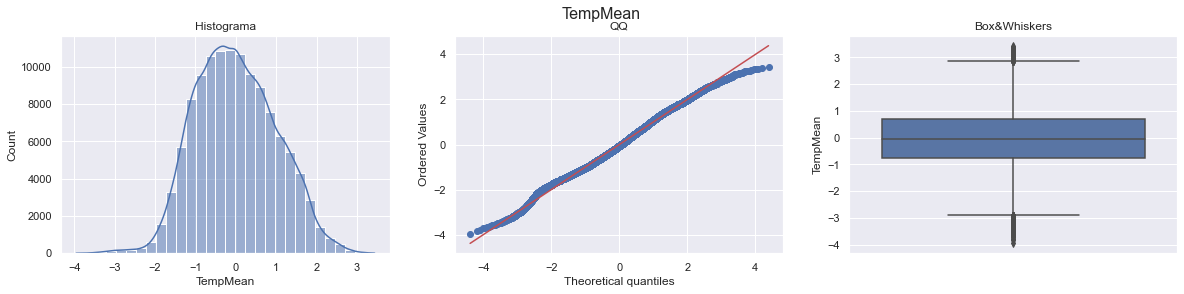

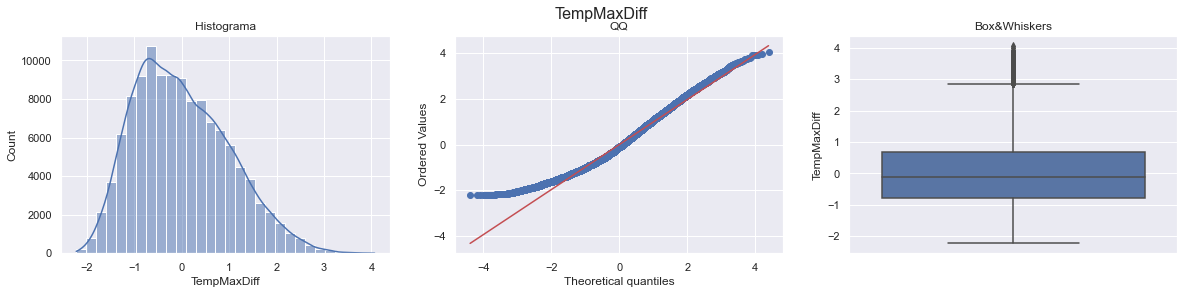

In [ ]:
norm_col = [
    'Rainfall', 
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    'RainfallYesterday', 
    'PressureMean',
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

for col in norm_col:
    outlier_diagnostic_plots(X_train, col)

In [ ]:
# Trim outlier
# outliers_total = np.array(np.repeat(False,X_train.shape[0]))
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 2.)
#     outliers = np.where(X_train[col] > upper_limit, True,
#                         np.where(X_train[col] < lower_limit, True, False))                        
#     outliers_total = np.logical_or(outliers_total, outliers)
    
#     print(str(col) + " outliers = "+str(outliers.sum()))

# print("Total outliers = "+str(outliers_total.sum()))

# X_train_trimmed = X_train.loc[~(outliers_total)]
# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_trimmed, col)

# Capping outlier

# X_train_capped = X_train.copy()
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
#     X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
#                           np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_capped, col)


Rainfall outliers = 21365
WindGustSpeed outliers = 2564
WindSpeed9am outliers = 1127
WindSpeed3pm outliers = 1080
Humidity9am outliers = 294
Humidity3pm outliers = 0
RainfallYesterday outliers = 21554
PressureMean outliers = 439
TempDiff outliers = 281
TempMean outliers = 57
TempMaxDiff outliers = 96
Total outliers = 36827


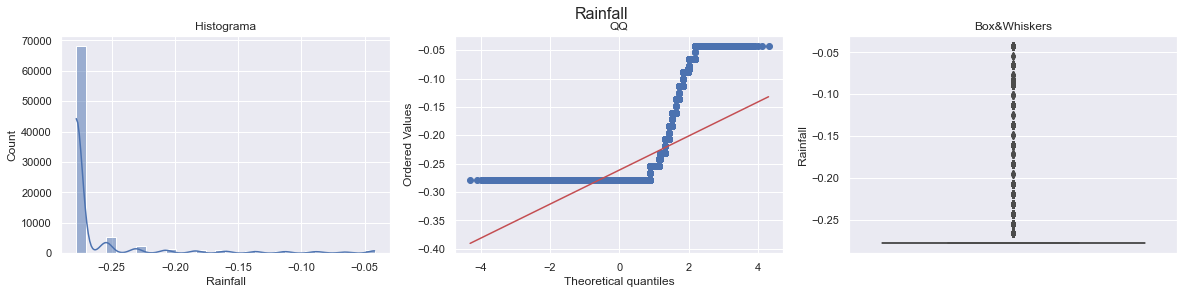

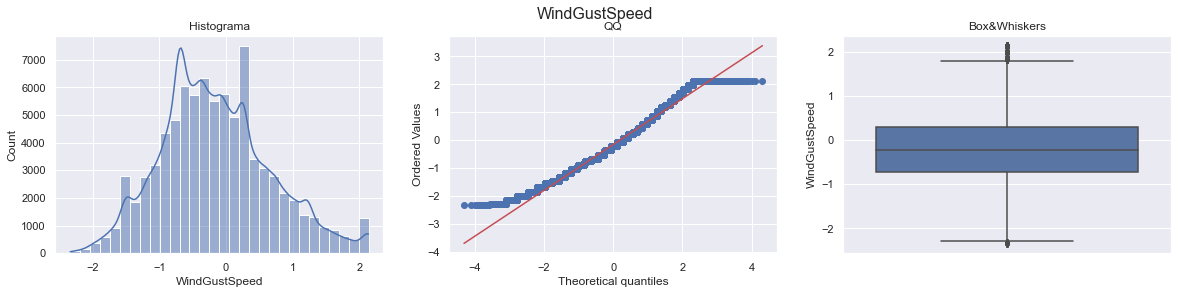

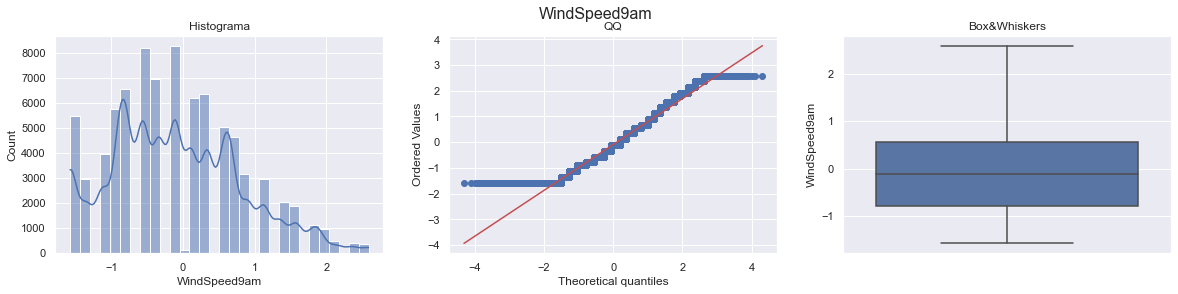

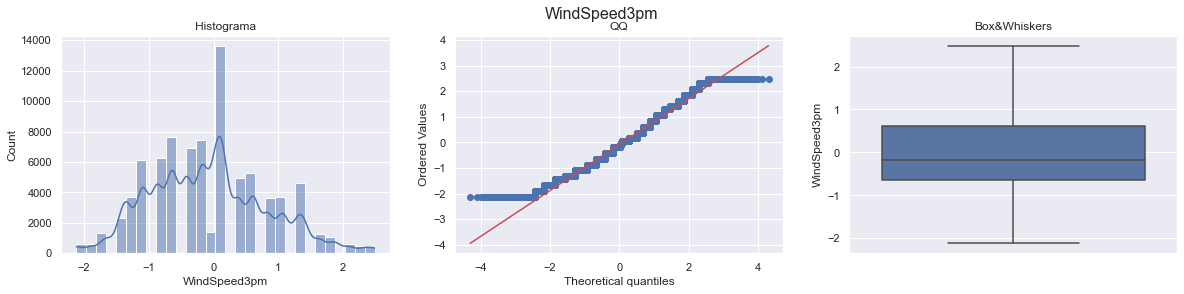

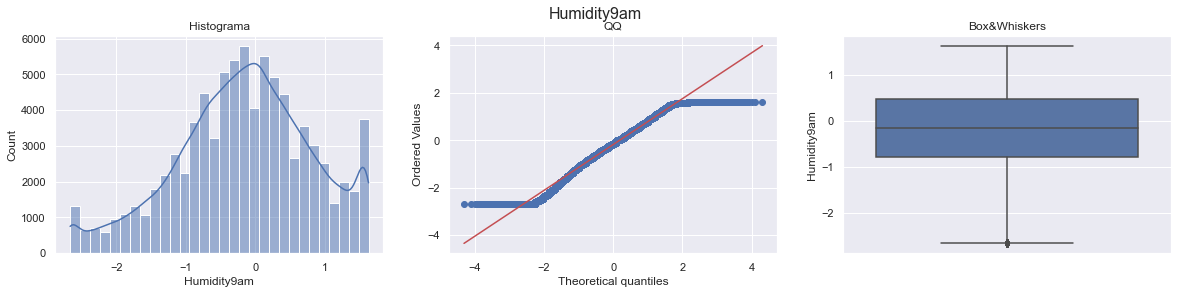

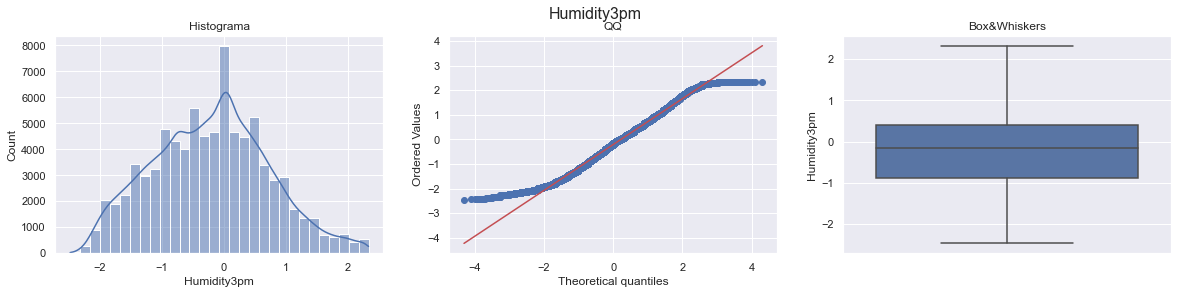

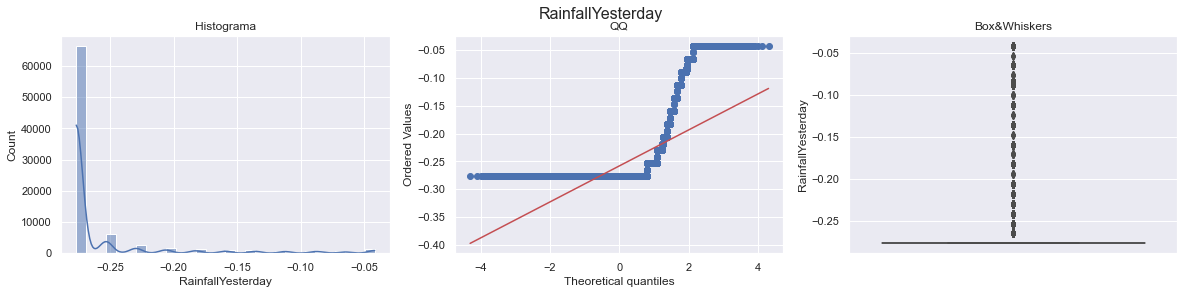

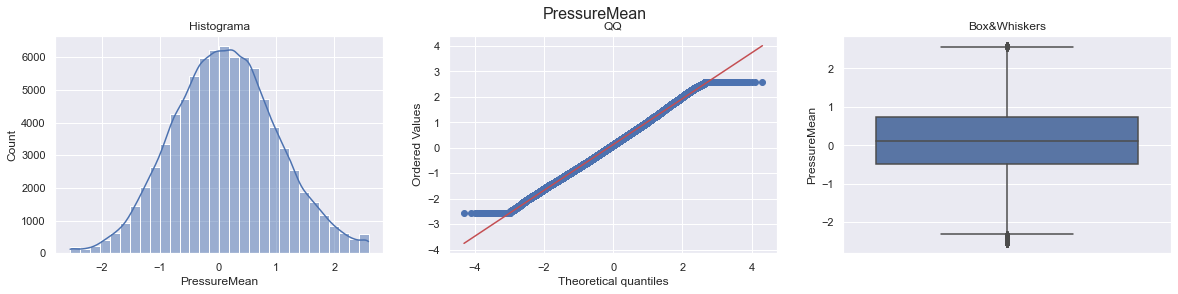

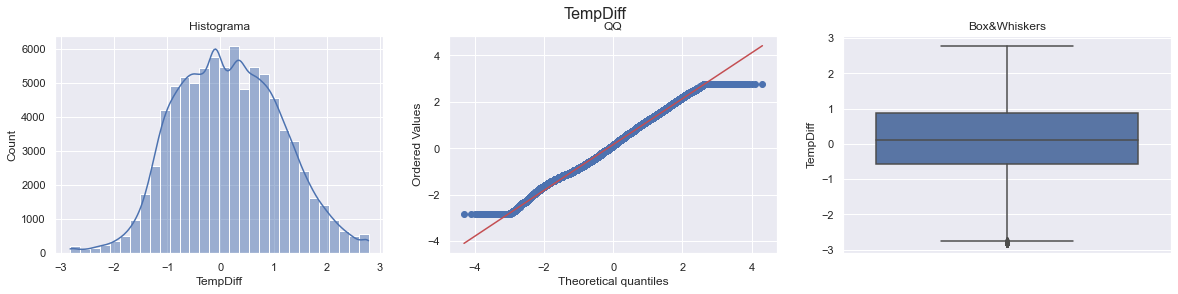

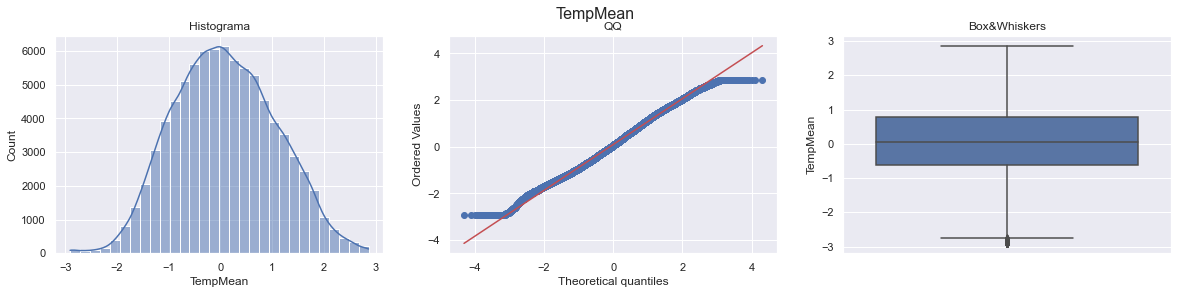

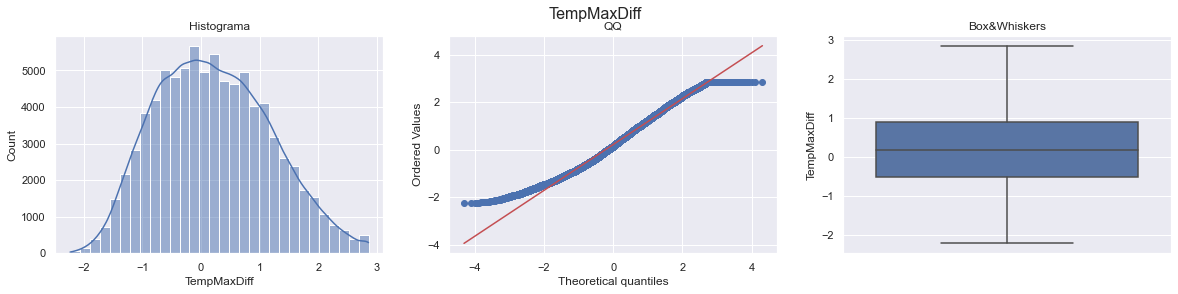

In [54]:
# Trimming and capping outliers
outliers_total = np.array(np.repeat(False,X_train.shape[0]))
X_train_capped = X_train.copy()
for col in norm_col:
    
    upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.8)
    outliers = np.where(X_train[col] > upper_limit, True,
                        np.where(X_train[col] < lower_limit, True, False))                        
    outliers_total = np.logical_or(outliers_total, outliers)
    
    print(str(col) + " outliers = "+str(outliers.sum()))

    upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
    X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
                          np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

print("Total outliers = "+str(outliers_total.sum()))

X_train_trimmed = X_train_capped.loc[~(outliers_total)]
for col in norm_col:
    outlier_diagnostic_plots(X_train_trimmed, col)

# Scaled

In [30]:
scaled_columns = [
    'Rainfall', 
    'WindGustSpeed',
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    'RainfallYesterday',
    'PressureMean', 
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[scaled_columns] = scaler.fit_transform(X_train[scaled_columns])

# Correlation

In [32]:
df_train = X_train
df_train['RainTomorrow']=y_train

df_test = X_test
df_test['RainTomorrow']=y_test

In [33]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

In [34]:
# sns.pairplot(df)

In [35]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

def select_features_mi(X_train, y_train, k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  return X_train_fs, fs


In [36]:
# sub_df_train = df_train[['WindDir9am','WindDir3pm','WindGustDir','RainTomorrow']].dropna()

# X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
# plt.figure(figsize=(22,10))
# sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

In [37]:
# sub_df_train = df_train.dropna()

# X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
# plt.figure(figsize=(25,10))
# sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

In [38]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

# Imputation

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,Adelaide,61,19,19,218,14,5,5,5,5,61,79,2,9,0,3
1,Albany,17,2547,2547,208,643,50,602,38,588,17,16,17,588,28,77
2,Albury,17,9,9,443,36,4,7,4,4,17,20,0,8,0,6
3,AliceSprings,5,44,44,204,3,2,1,2,3,5,6,0,1,0,1
4,BadgerysCreek,43,14,14,334,49,19,19,26,27,43,57,113,29,3,11
5,Ballarat,7,23,23,77,11,7,3,18,6,7,11,18,13,3,1
6,Bendigo,3,30,29,215,34,2,2,5,1,3,6,6,3,0,2
7,Brisbane,25,11,11,57,23,0,2,2,9,25,31,0,10,1,10
8,Cairns,22,15,14,33,4,0,1,0,0,22,29,0,0,0,0
9,Canberra,13,284,283,454,195,193,190,49,12,13,16,180,21,0,5


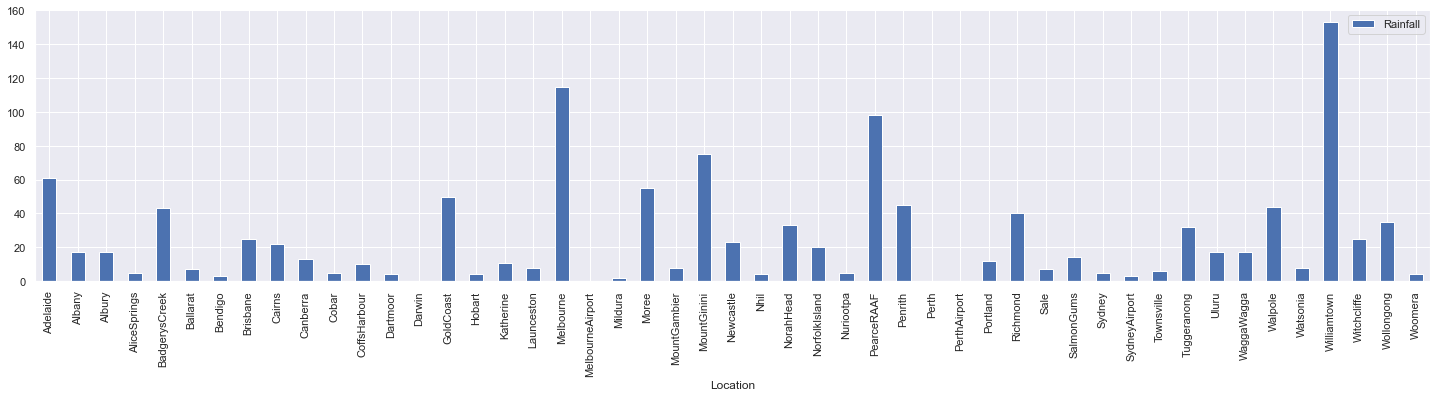

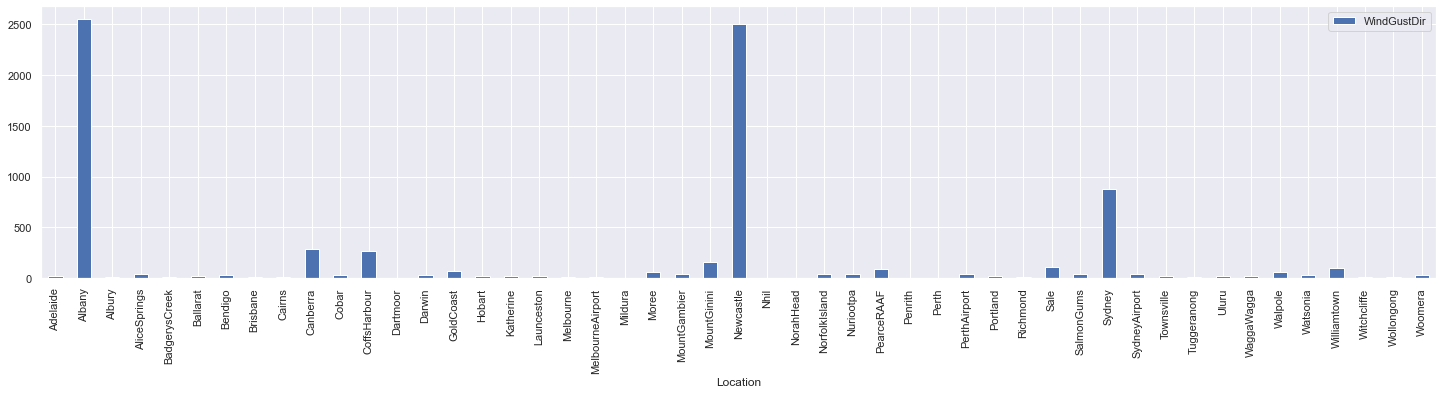

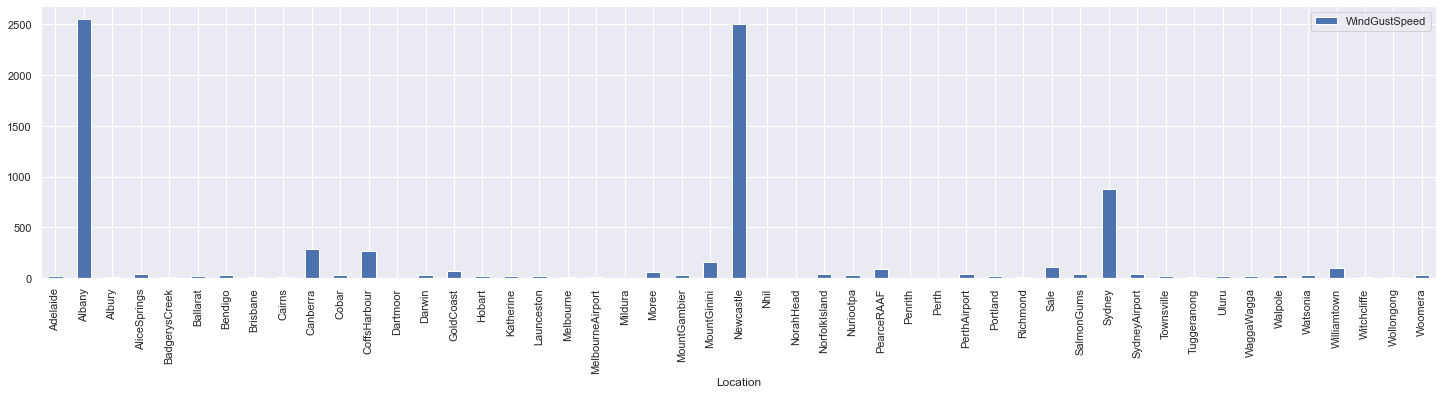

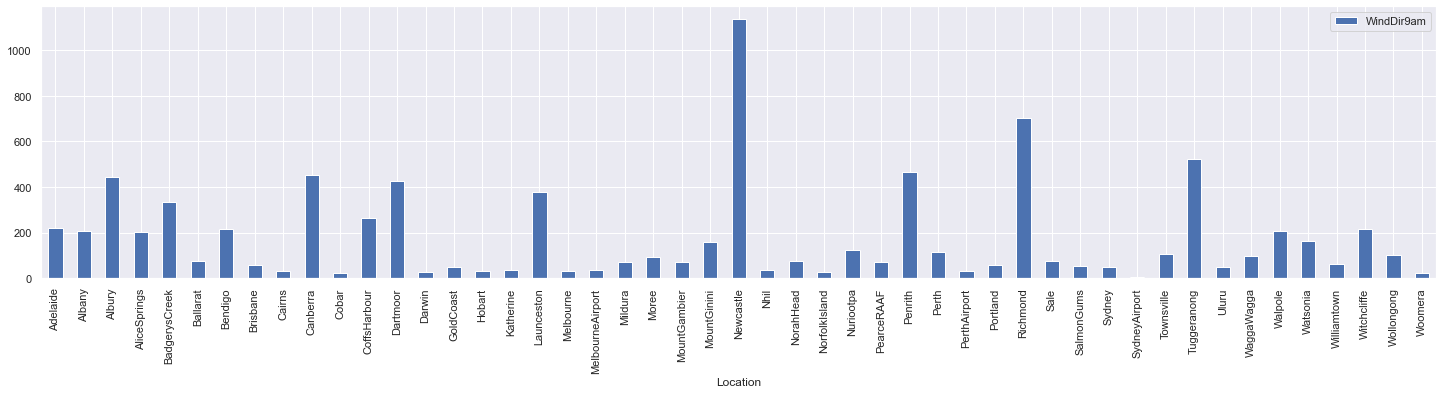

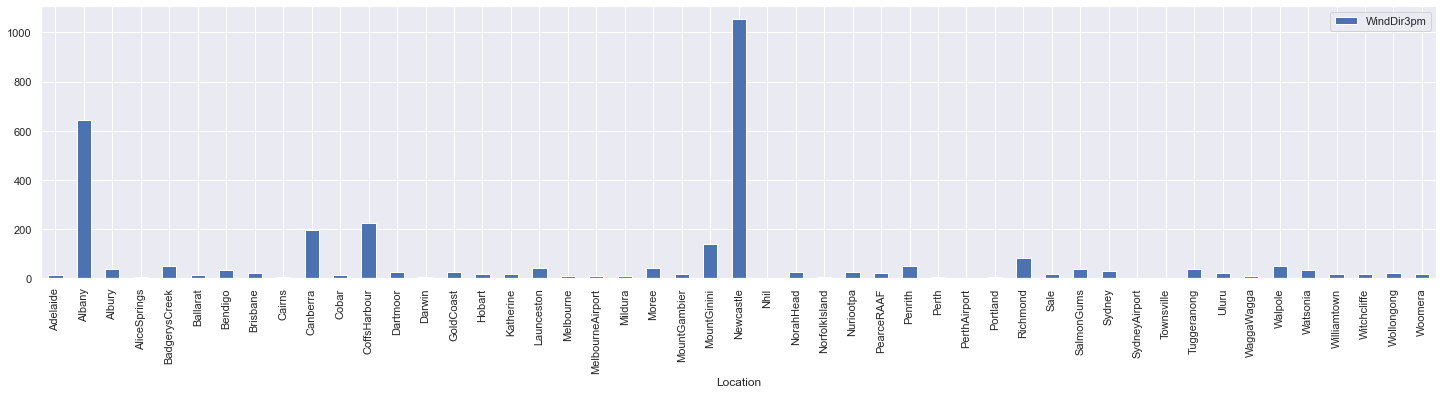

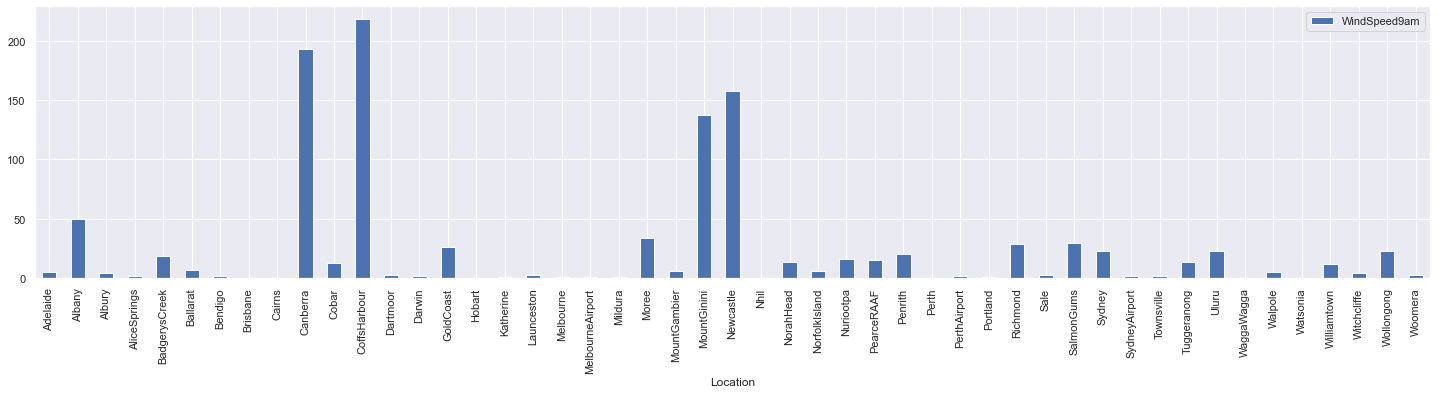

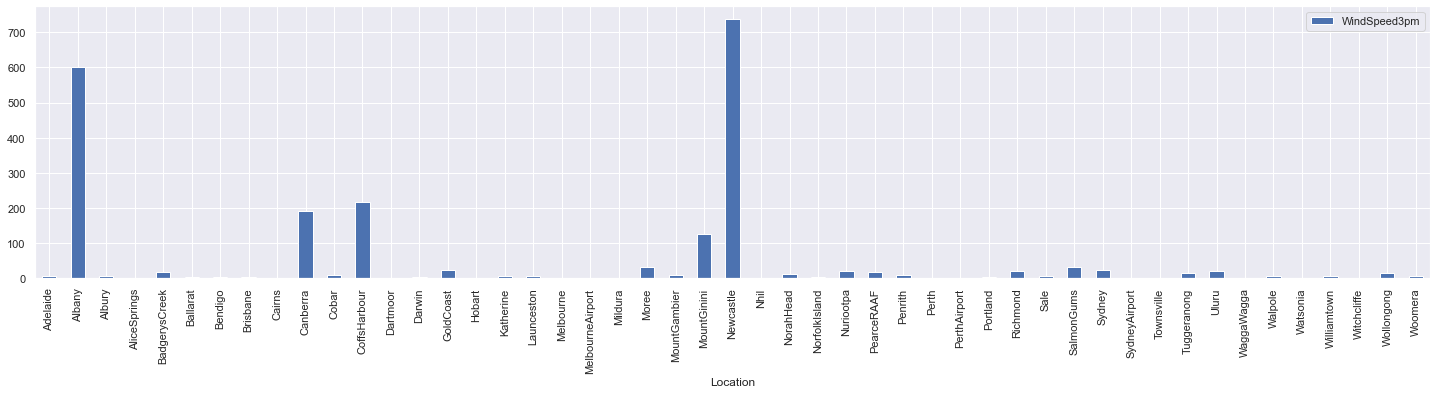

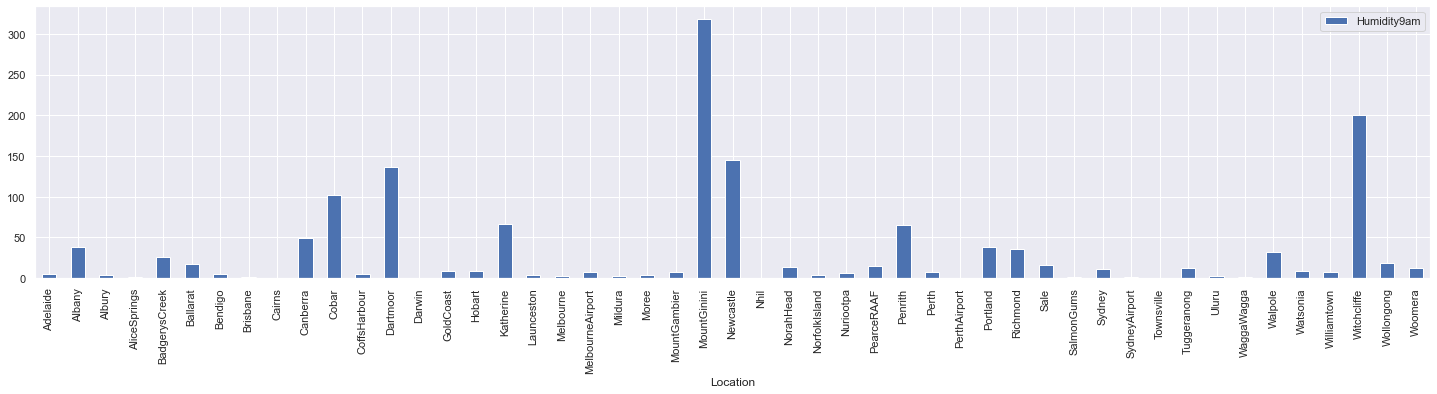

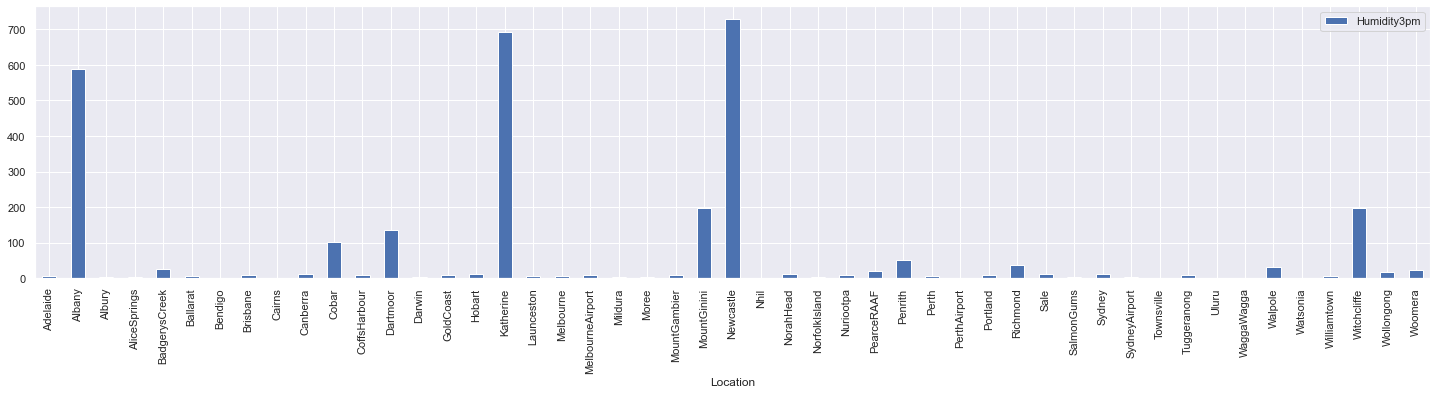

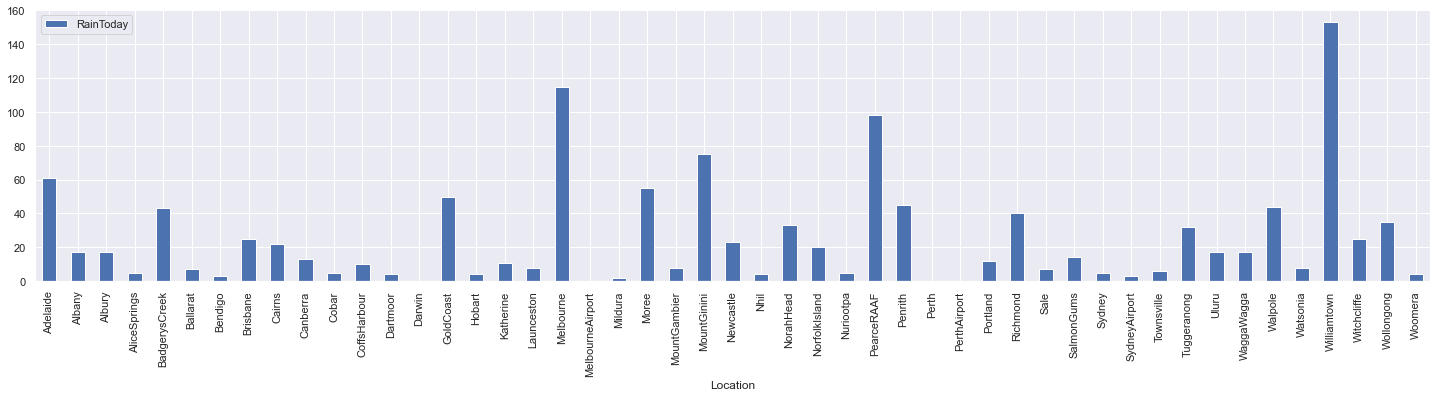

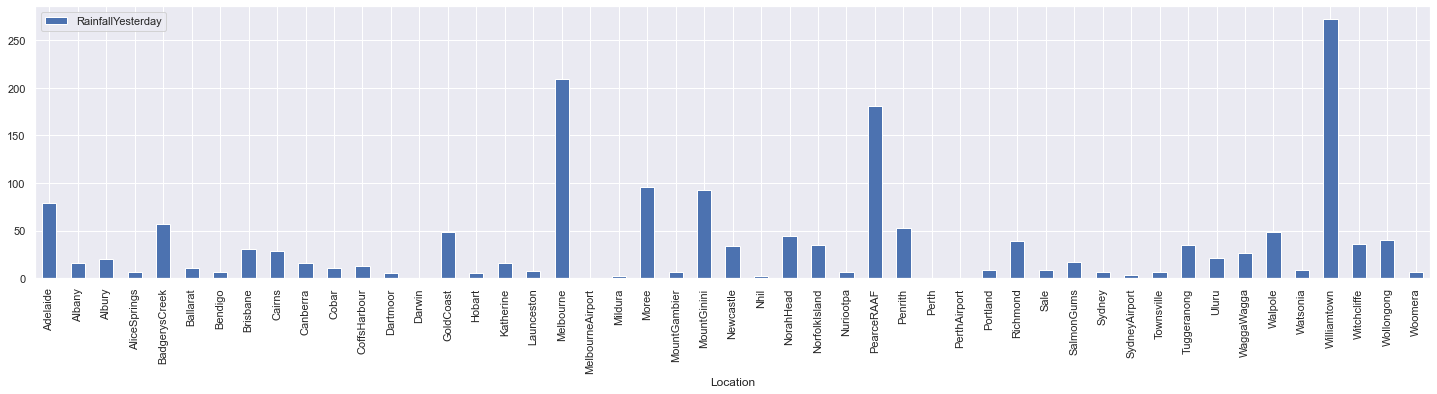

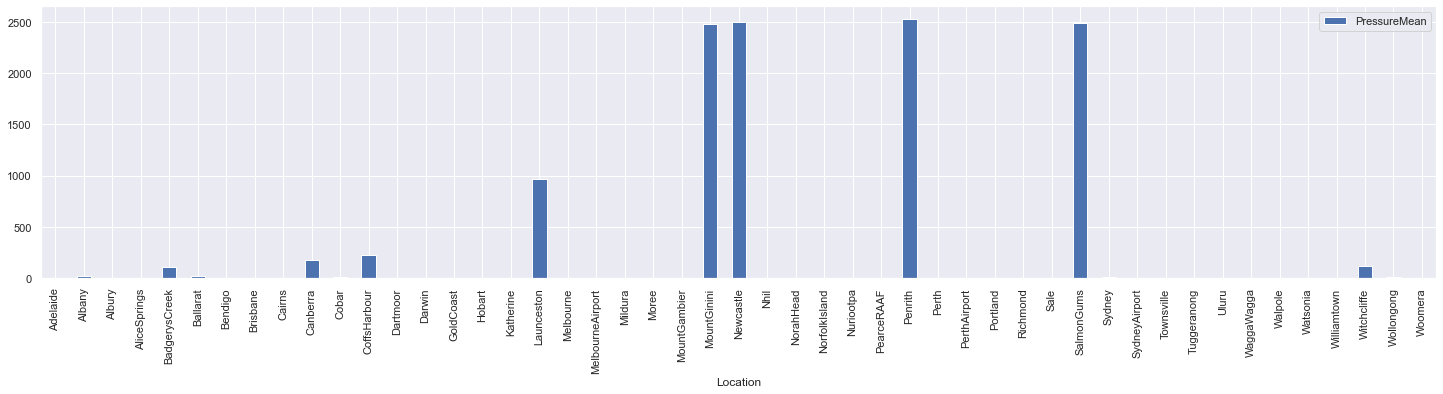

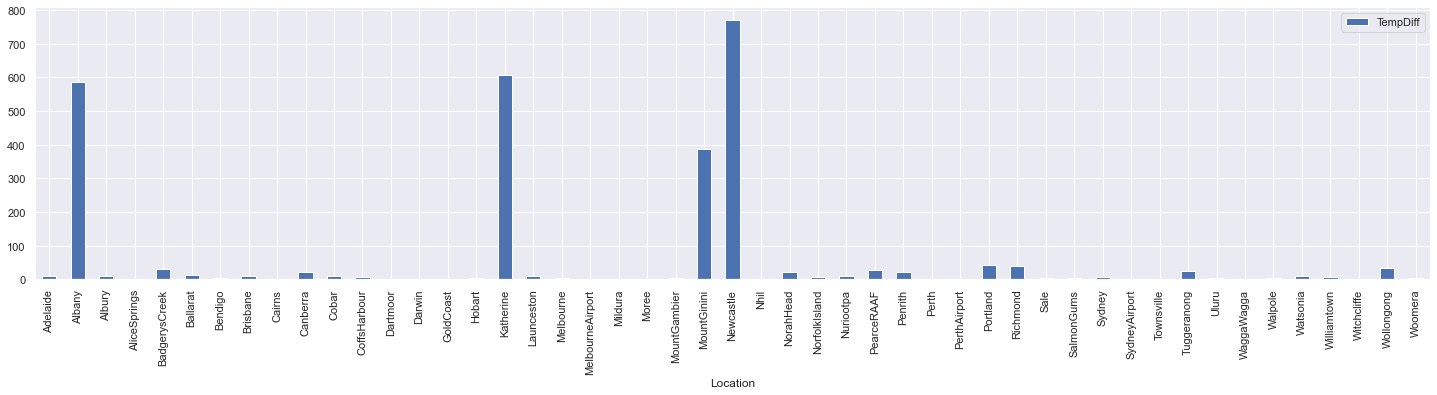

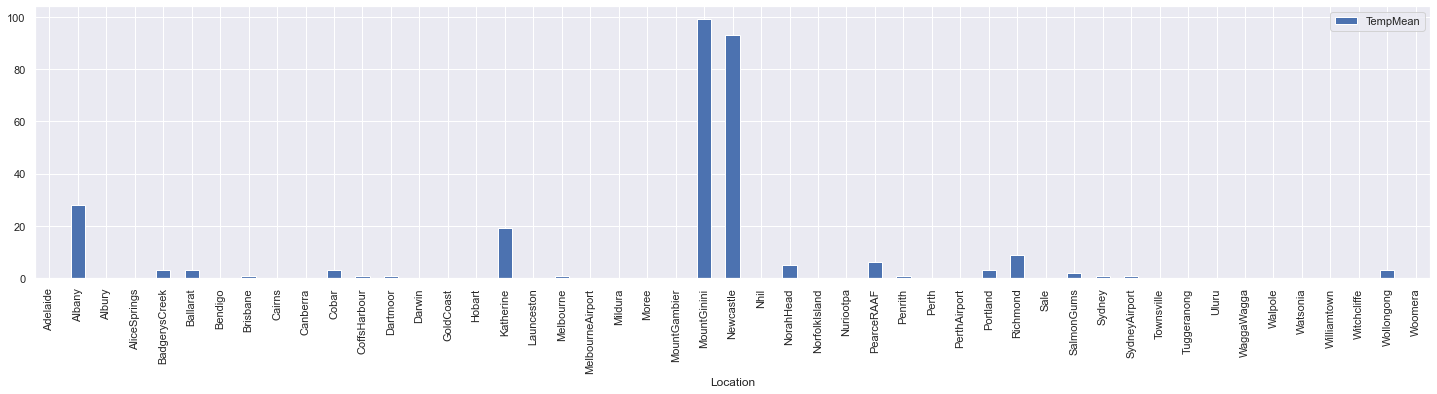

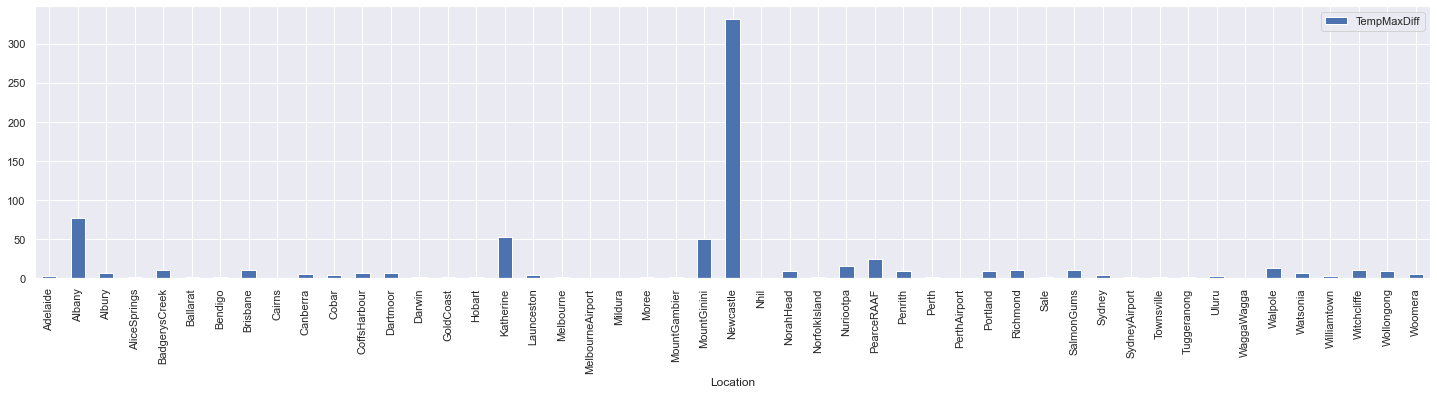

In [39]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_location = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['Location']).sum().astype(int)
df_nan_location.reset_index('Location',inplace=True)

for col in list(df_nan_location.drop(['Location'],axis=1).columns.values):
    df_nan_location.plot.bar(x='Location', y=col, rot=90, figsize=(25,5))
    
df_nan_location

In [40]:
drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)
df_nan_clusters

,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,1324,54843,-1510,66399,47349,-1065,1511,534,1643,1696,1264,-2222,-2517,6065,-1418
1,1,2201,280709,-2353,294957,302110,-4695,-3520,956,3365,9577,2312,2757,-3487,118,-3280
2,2,-627,116543,252,109374,146576,745,-655,-2071,-308,4095,-649,1092,-2212,597,1717
3,3,345,56889,198,59503,61132,762,-129,-6132,-5329,1259,320,-4375,2463,9233,3853
4,4,232,18228,473,19590,21156,1740,914,244,1978,783,218,137,-2903,303,-3112
5,5,-3475,338890,2939,285994,339988,2513,1879,6469,-1350,9355,-3467,2610,8658,-16316,2240


,LocationType,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,PressureMean,TempDiff,TempMean,TempMaxDiff
0,0,68,48,46,841,88,31,23,36,36,68,75,5,40,9,12
1,1,622,4476,4474,3944,1951,906,1437,793,1212,622,879,8067,1341,211,456
2,2,198,2799,2767,900,772,106,659,296,847,198,299,2634,623,36,137
3,3,33,124,123,313,44,28,29,71,698,33,43,0,614,19,58
4,4,20,39,38,25,5,6,2,4,2,20,35,0,6,0,1
5,5,269,429,415,2485,316,56,69,283,248,269,394,1008,123,8,62


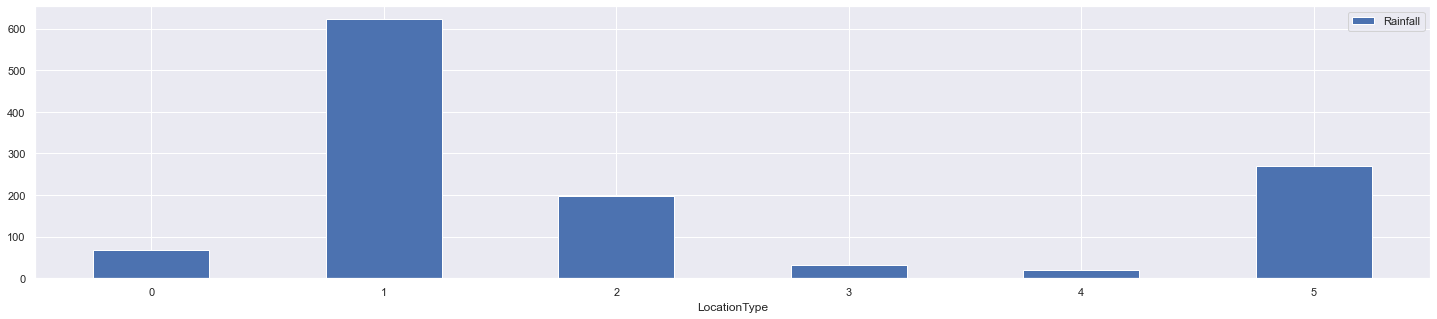

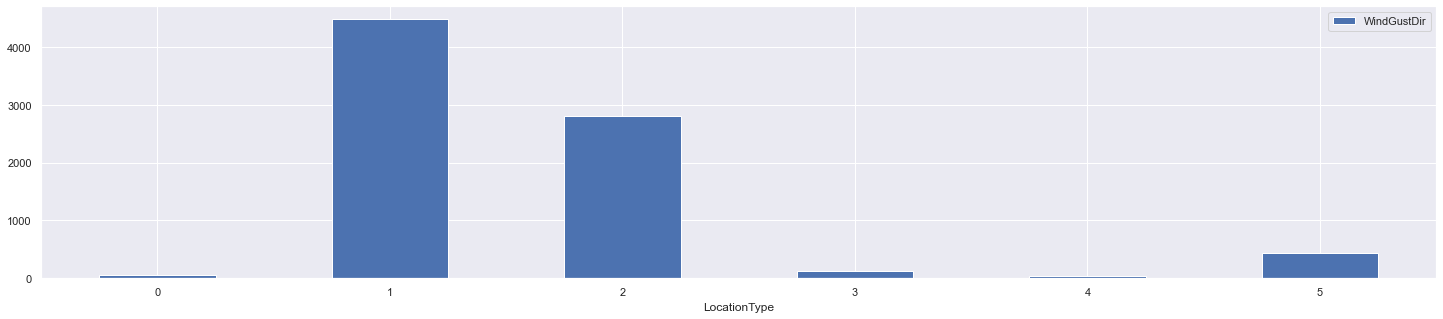

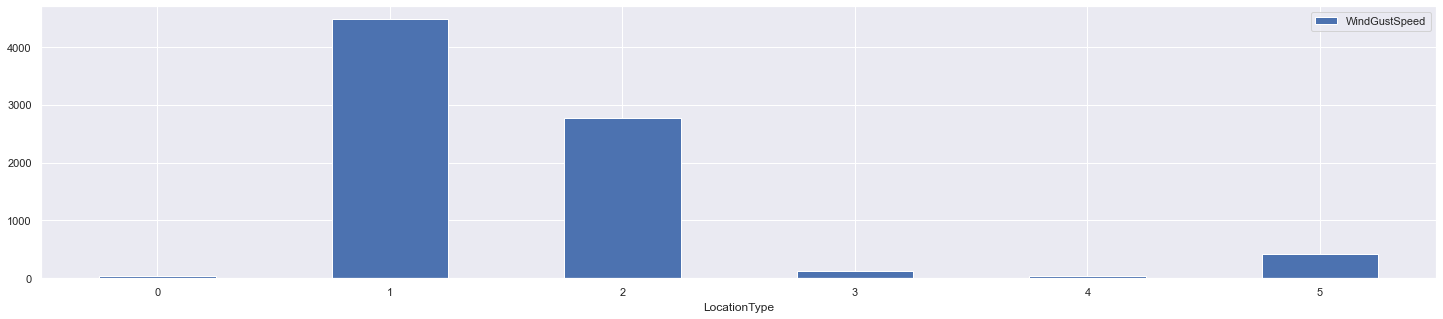

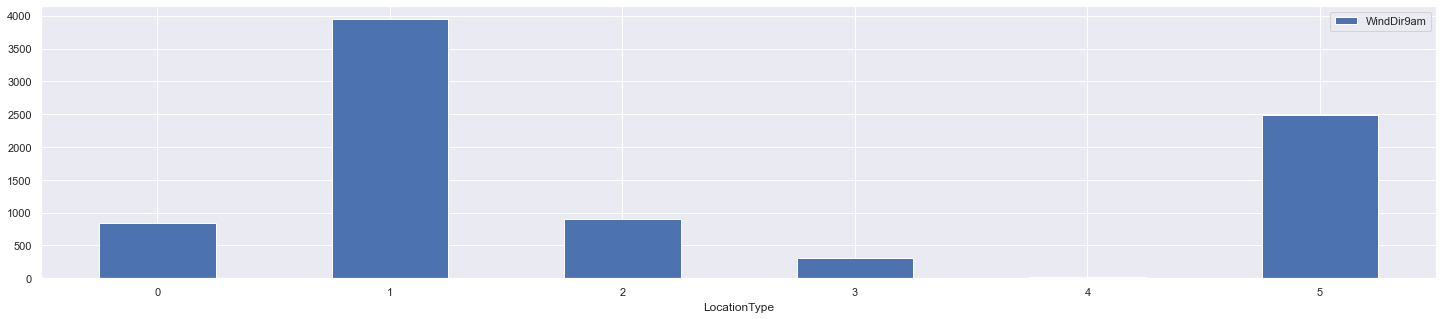

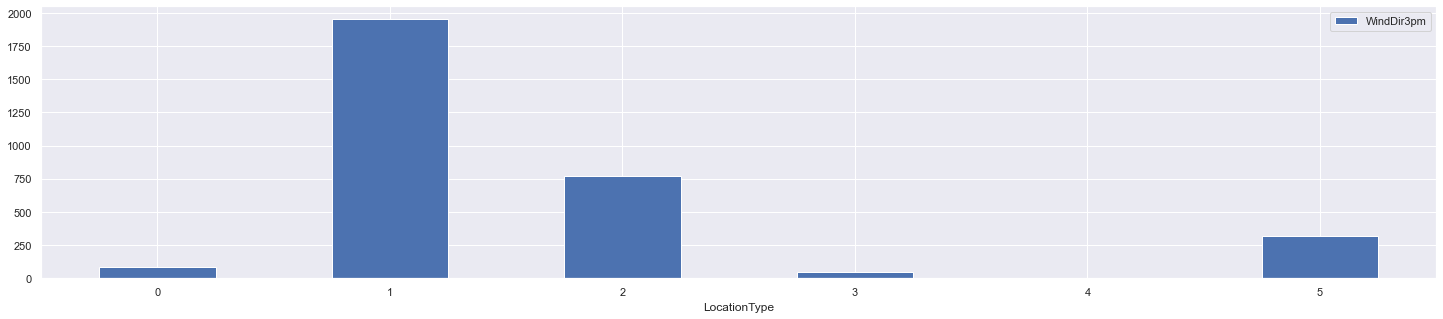

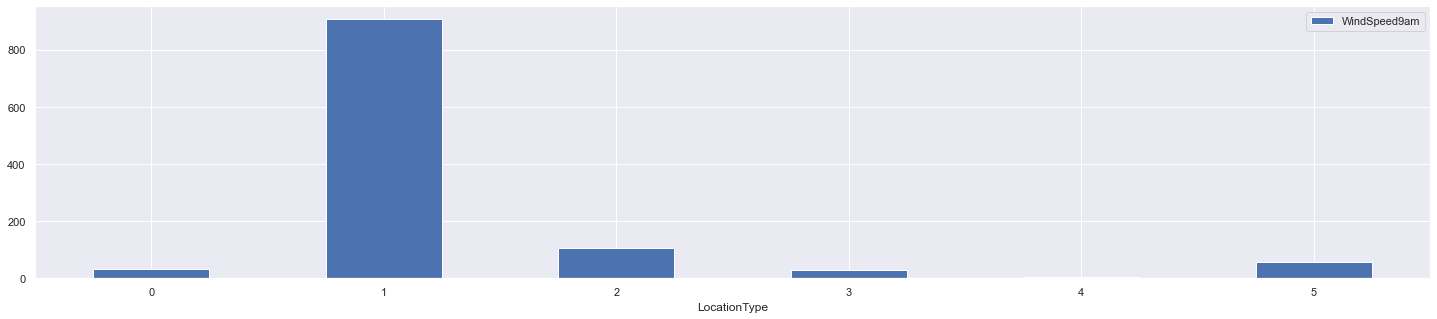

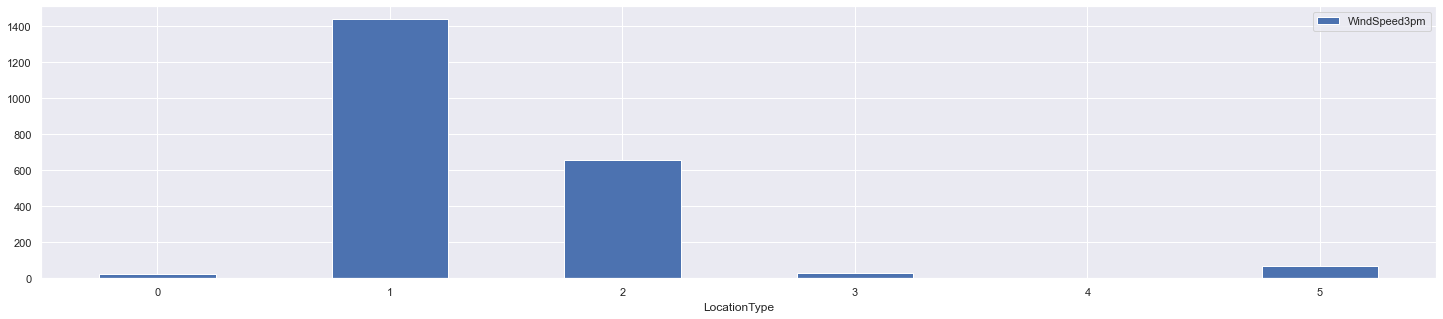

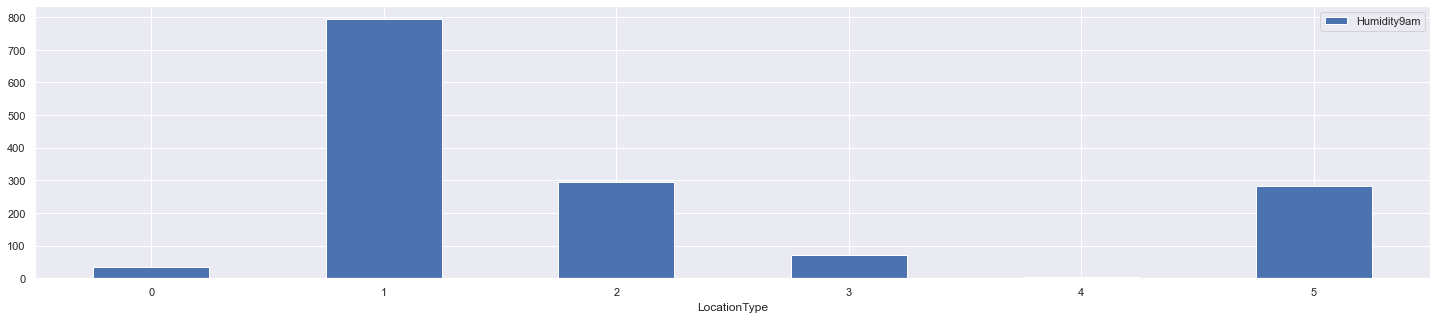

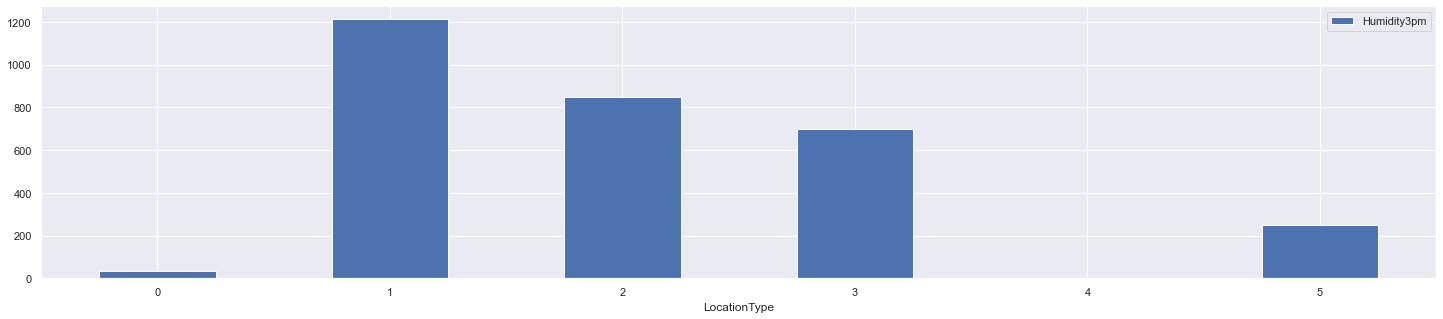

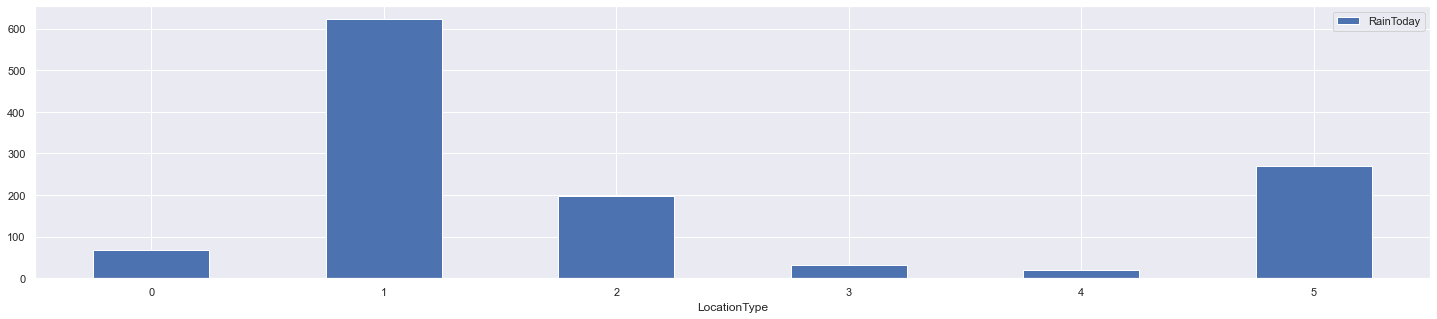

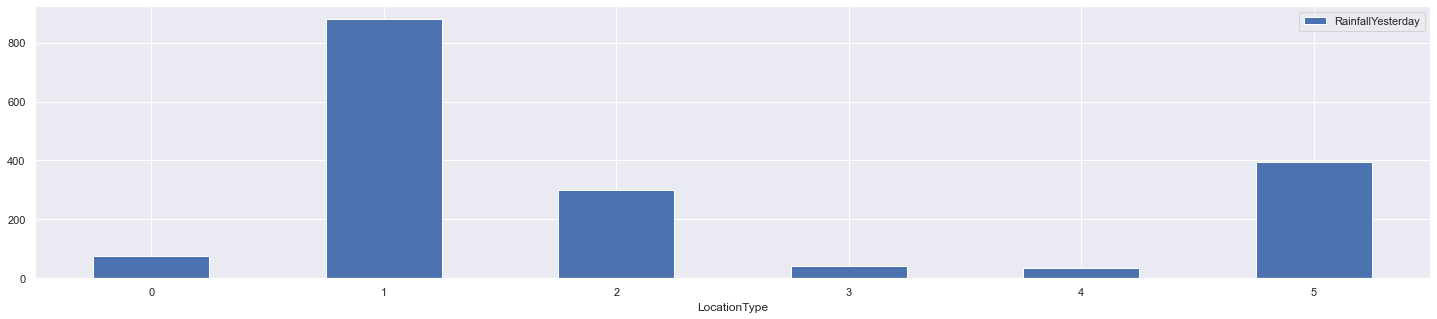

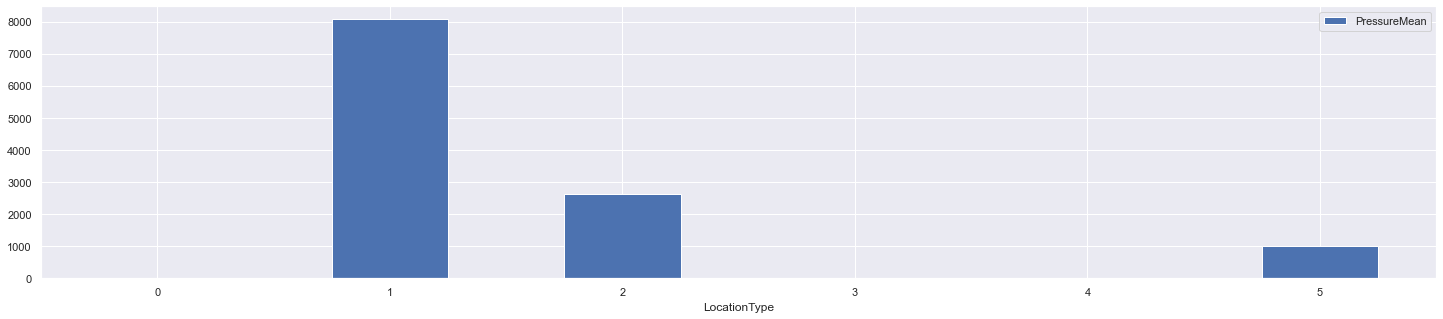

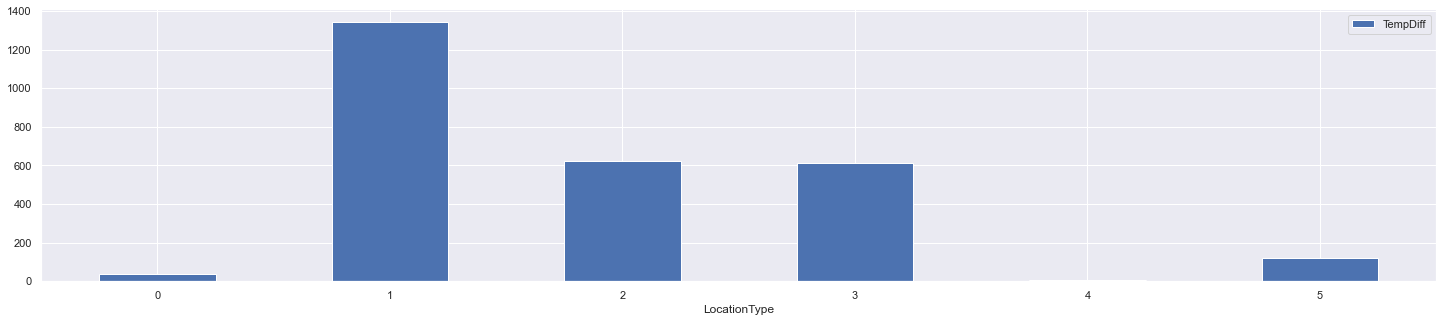

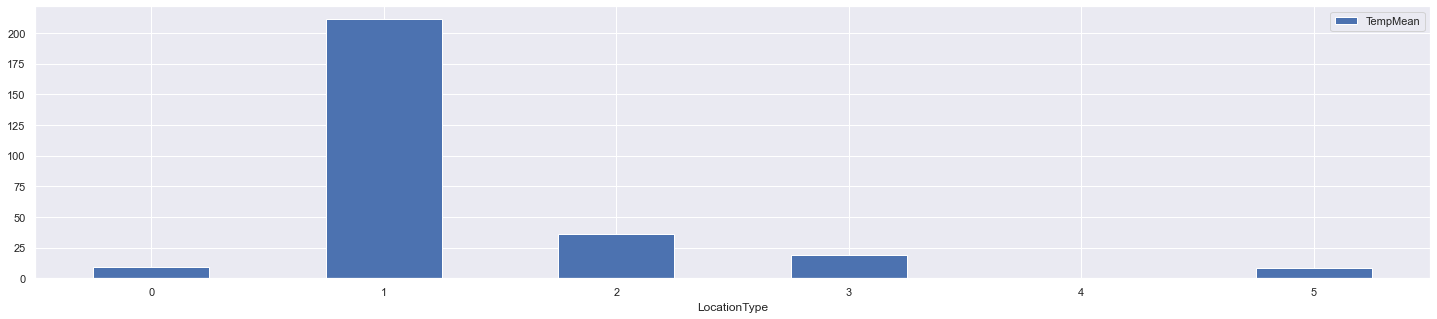

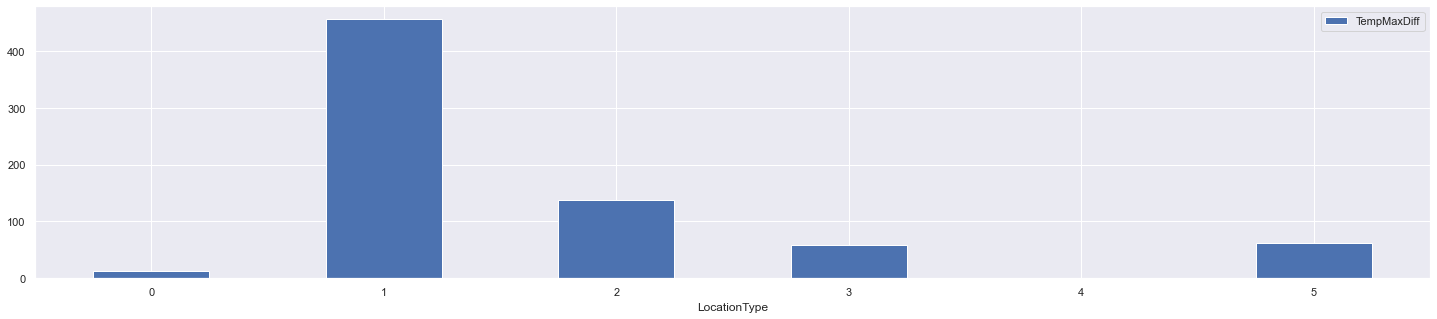

In [41]:
pd.set_option("display.max_columns", None)
%matplotlib inline

drop_df_nan = drop_columns+['RainTomorrow']+[col for col in X_train if col.startswith('LocationType_')]
df_nan_clusters = X_train.drop(drop_df_nan,axis=1).isnull().groupby(X_train['LocationType']).sum().astype(int)
df_nan_clusters.reset_index('LocationType',inplace=True)

for col in list(df_nan_clusters.drop(['LocationType'],axis=1).columns.values):
    df_nan_clusters.plot.bar(x='LocationType', y=col, rot=0, figsize=(25,5))
    
df_nan_clusters

In [42]:
# The column with %NaN <= 5% will be imputed with a simple imputer (using mean).
# The column with %NaN > 5% will be imputed using KNN algorithm.
print("Percentage of NaN for each column:\nColumns with %NaN <= 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)<5])
print("\nColumns with %NaN > 5%:\n")
print(((1-X_train.count()/X_train.count().max())*100)[((1-X_train.count()/X_train.count().max())*100)>5])


Percentage of NaN for each column:
Columns with %NaN <= 5%:

Location             0.000000
Rainfall             1.001747
WindDir3pm           2.629379
WindSpeed9am         0.937999
WindSpeed3pm         1.837088
Humidity9am          1.227761
Humidity3pm          2.519269
RainToday            1.001747
RainfallYesterday    1.428110
LocationType         0.000000
LocationType_0       0.000000
LocationType_1       0.000000
LocationType_2       0.000000
LocationType_3       0.000000
LocationType_4       0.000000
TempDiff             2.274214
TempMean             0.234293
TempMaxDiff          0.601048
RainTomorrow         0.000000
dtype: float64

Columns with %NaN > 5%:

WindGustDir      6.552749
WindGustSpeed    6.509699
WindDir9am       7.043688
PressureMean     9.697903
dtype: float64


## Simple mean imputation

In [43]:
from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper

# Consider discrete variables: WindDir3pm -> must be integer
# RainToday -> will be imputed by KNN
imputed_by_mean_col = [
    'Rainfall',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'RainfallYesterday',
    'TempDiff',
    'TempMean',
    'TempMaxDiff',
    'WindDir3pm'
]

In [44]:
X_train_imputed = X_train.copy()
X_train_imputed['imputed_mean'] = 0

imputer = SimpleImputer(strategy='mean',add_indicator=True)

for k in np.sort(pd.unique(X_train['LocationType'])):
    
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy().index # Get index
    mapper = DataFrameMapper([(imputed_by_mean_col, imputer)])
    
    # X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][imputed_by_mean_col].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(imputed_by_mean_col) # Number of imputed columns
    imputed_by_mean_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=imputed_by_mean_col+imputed_by_mean_imp_col)

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_mean'] = (transform_features_df[imputed_by_mean_imp_col].sum(axis=1)>0).astype(int)


    X_train_imputed.loc[indx,imputed_by_mean_col+['imputed_mean']]=transform_features_df[imputed_by_mean_col+['imputed_mean']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed[X_train_imputed.LocationType==k][imputed_by_mean_col].isna().sum()>0))

# Round discrete columns    
X_train_imputed.WindDir3pm = X_train_imputed.WindDir3pm.round()

X_train_imputed.head()

Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,RainTomorrow,imputed_mean
66916,MelbourneAirport,0.099594,9.0,1.253092,8.0,9.0,1.124672,2.314783,0.583519,0.889083,1.0,2.118661,5,0.0,0.0,0.0,0.0,0.0,-1.185449,-0.945311,-1.082088,-0.714964,1,0
118862,PerthAirport,0.075988,8.0,-1.174761,4.0,6.0,-0.561157,-0.640622,1.107730,0.120202,1.0,-0.112184,2,0.0,0.0,1.0,0.0,0.0,1.219289,0.232485,-0.341395,-0.614092,0,0
110872,Albany,-0.254494,NaN,NaN,0.0,1.0,1.799004,0.041394,0.216572,1.177414,0.0,-0.276562,2,0.0,0.0,1.0,0.0,0.0,-0.065141,-0.917268,-0.781182,-1.501769,1,0
52439,MountGinini,-0.278100,8.0,-0.071191,9.0,10.0,0.337952,0.041394,-1.093955,-1.033120,0.0,0.054605,1,0.0,1.0,0.0,0.0,0.0,NaN,0.905512,-0.372257,0.858644,0,1
101685,MountGambier,-0.278100,14.0,-0.071191,14.0,11.0,0.675118,0.155064,-0.674586,-0.504514,0.0,-0.276562,5,0.0,0.0,0.0,0.0,0.0,1.183610,0.428785,0.098392,0.898993,0,0


## KNN imputation

In [45]:
# Consider discrete variables: RainToday, WindDir9am, WindGustDir -> must be integer
imputed_by_knn_col = [
    'RainToday',
    'WindGustDir',
    'WindGustSpeed',
    'WindDir9am',
    'PressureMean'
]
neighbors_col =[
    'Rainfall',
    'WindDir3pm',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
]

In [46]:
X_train_imputed_knn = X_train_imputed.copy()

from sklearn.impute import KNNImputer
X_train_imputed_knn['imputed_knn'] = 0
neighbors = 5
imputer = KNNImputer(n_neighbors=neighbors,add_indicator=True)

knn_cols = imputed_by_knn_col + neighbors_col

for k in np.sort(pd.unique(X_train['LocationType'])):
    print("Running for cluster: "+str(k))

    indx=X_train.loc[X_train['LocationType'] == k][knn_cols].copy().index # Get index
    mapper = DataFrameMapper([(knn_cols, imputer)])

    # X_train.loc[X_train['LocationType'] == k][knn_cols+['LocationType']]
    transform_features = mapper.fit_transform(X_train.loc[X_train['LocationType'] == k][knn_cols].copy(), 4) # Round 4 digits
    qty_imputed_cols = np.array(transform_features).shape[1]-len(knn_cols) # Number of imputed columns
    imputed_by_knn_imp_col = [str(d) + "_imputed" for d in range(qty_imputed_cols)] # Name of indicators of imputation
    transform_features_df = pd.DataFrame(transform_features, index=indx, columns=knn_cols+imputed_by_knn_imp_col)
    transform_features_df.isna().sum()

    # Add column of imputed indicator. Only one column as an "or" logical operation of all indicators.
    transform_features_df['imputed_knn'] = (transform_features_df[imputed_by_knn_imp_col].sum(axis=1)>0).astype(int)

    X_train_imputed_knn.loc[indx,imputed_by_knn_col+['imputed_knn']]=transform_features_df[imputed_by_knn_col+['imputed_knn']] # Replace in original dataset

    # Check data
    assert(not np.any(X_train_imputed_knn[X_train_imputed_knn.LocationType==k][imputed_by_knn_col].isna().sum()>0))

# Round discrete columns   
X_train_imputed_knn.RainToday = X_train_imputed_knn.RainToday.round()
X_train_imputed_knn.WindDir9am = X_train_imputed_knn.WindDir9am.round()
X_train_imputed_knn.WindGustDir = X_train_imputed_knn.WindGustDir.round()
X_train_imputed_knn.head()


Running for cluster: 0
Running for cluster: 1
Running for cluster: 2
Running for cluster: 3
Running for cluster: 4
Running for cluster: 5


,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,RainTomorrow,imputed_mean,imputed_knn
66916,MelbourneAirport,0.099594,9.0,1.253092,8.0,9.0,1.124672,2.314783,0.583519,0.889083,1.0,2.118661,5,0.0,0.0,0.0,0.0,0.0,-1.185449,-0.945311,-1.082088,-0.714964,1,0,0
118862,PerthAirport,0.075988,8.0,-1.174761,4.0,6.0,-0.561157,-0.640622,1.107730,0.120202,1.0,-0.112184,2,0.0,0.0,1.0,0.0,0.0,1.219289,0.232485,-0.341395,-0.614092,0,0,0
110872,Albany,-0.254494,8.0,0.384951,0.0,1.0,1.799004,0.041394,0.216572,1.177414,0.0,-0.276562,2,0.0,0.0,1.0,0.0,0.0,-0.065141,-0.917268,-0.781182,-1.501769,1,0,1
52439,MountGinini,-0.278100,8.0,-0.071191,9.0,10.0,0.337952,0.041394,-1.093955,-1.033120,0.0,0.054605,1,0.0,1.0,0.0,0.0,0.0,0.701236,0.905512,-0.372257,0.858644,0,1,1
101685,MountGambier,-0.278100,14.0,-0.071191,14.0,11.0,0.675118,0.155064,-0.674586,-0.504514,0.0,-0.276562,5,0.0,0.0,0.0,0.0,0.0,1.183610,0.428785,0.098392,0.898993,0,0,0


In [47]:
print("Percentage of NaN for each imputed column:\n")
print(((1-X_train_imputed_knn.count()/X_train_imputed_knn.count().max())*100))

Percentage of NaN for each imputed column:

Location             0.0
Rainfall             0.0
WindGustDir          0.0
WindGustSpeed        0.0
WindDir9am           0.0
WindDir3pm           0.0
WindSpeed9am         0.0
WindSpeed3pm         0.0
Humidity9am          0.0
Humidity3pm          0.0
RainToday            0.0
RainfallYesterday    0.0
LocationType         0.0
LocationType_0       0.0
LocationType_1       0.0
LocationType_2       0.0
LocationType_3       0.0
LocationType_4       0.0
PressureMean         0.0
TempDiff             0.0
TempMean             0.0
TempMaxDiff          0.0
RainTomorrow         0.0
imputed_mean         0.0
imputed_knn          0.0
dtype: float64


In [48]:
X_train = X_train_imputed_knn

# Cyclic encoding for wind speed

In [49]:
wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
for wd in wind_dir_colums:
    X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
    X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

# X_train.drop(wind_dir_colums,axis=1, inplace=True)
drop_columns+=wind_dir_colums
X_train.head()

,Location,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,RainToday,RainfallYesterday,LocationType,LocationType_0,LocationType_1,LocationType_2,LocationType_3,LocationType_4,PressureMean,TempDiff,TempMean,TempMaxDiff,RainTomorrow,imputed_mean,imputed_knn,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
66916,MelbourneAirport,0.099594,9.0,1.253092,8.0,9.0,1.124672,2.314783,0.583519,0.889083,1.0,2.118661,5,0.0,0.0,0.0,0.0,0.0,-1.185449,-0.945311,-1.082088,-0.714964,1,0,0,-0.923880,-3.826834e-01,-1.000000e+00,1.224647e-16,-0.923880,-0.382683
118862,PerthAirport,0.075988,8.0,-1.174761,4.0,6.0,-0.561157,-0.640622,1.107730,0.120202,1.0,-0.112184,2,0.0,0.0,1.0,0.0,0.0,1.219289,0.232485,-0.341395,-0.614092,0,0,0,-1.000000,1.224647e-16,6.123234e-17,1.000000e+00,-0.707107,0.707107
110872,Albany,-0.254494,8.0,0.384951,0.0,1.0,1.799004,0.041394,0.216572,1.177414,0.0,-0.276562,2,0.0,0.0,1.0,0.0,0.0,-0.065141,-0.917268,-0.781182,-1.501769,1,0,1,-1.000000,1.224647e-16,1.000000e+00,0.000000e+00,0.923880,0.382683
52439,MountGinini,-0.278100,8.0,-0.071191,9.0,10.0,0.337952,0.041394,-1.093955,-1.033120,0.0,0.054605,1,0.0,1.0,0.0,0.0,0.0,0.701236,0.905512,-0.372257,0.858644,0,1,1,-1.000000,1.224647e-16,-9.238795e-01,-3.826834e-01,-0.707107,-0.707107
101685,MountGambier,-0.278100,14.0,-0.071191,14.0,11.0,0.675118,0.155064,-0.674586,-0.504514,0.0,-0.276562,5,0.0,0.0,0.0,0.0,0.0,1.183610,0.428785,0.098392,0.898993,0,0,0,0.707107,-7.071068e-01,7.071068e-01,-7.071068e-01,-0.382683,-0.923880


# Normalization

In [50]:
norm_col = [
    'Rainfall', 
    'WindGustSpeed', 
    'WindSpeed9am', 
    'WindSpeed3pm', 
    'Humidity9am',
    'Humidity3pm', 
    'RainfallYesterday', 
    'PressureMean',
    'TempDiff', 
    'TempMean', 
    'TempMaxDiff'
]

In [51]:
X_train['Rainfall'].max()

43.510814034987305

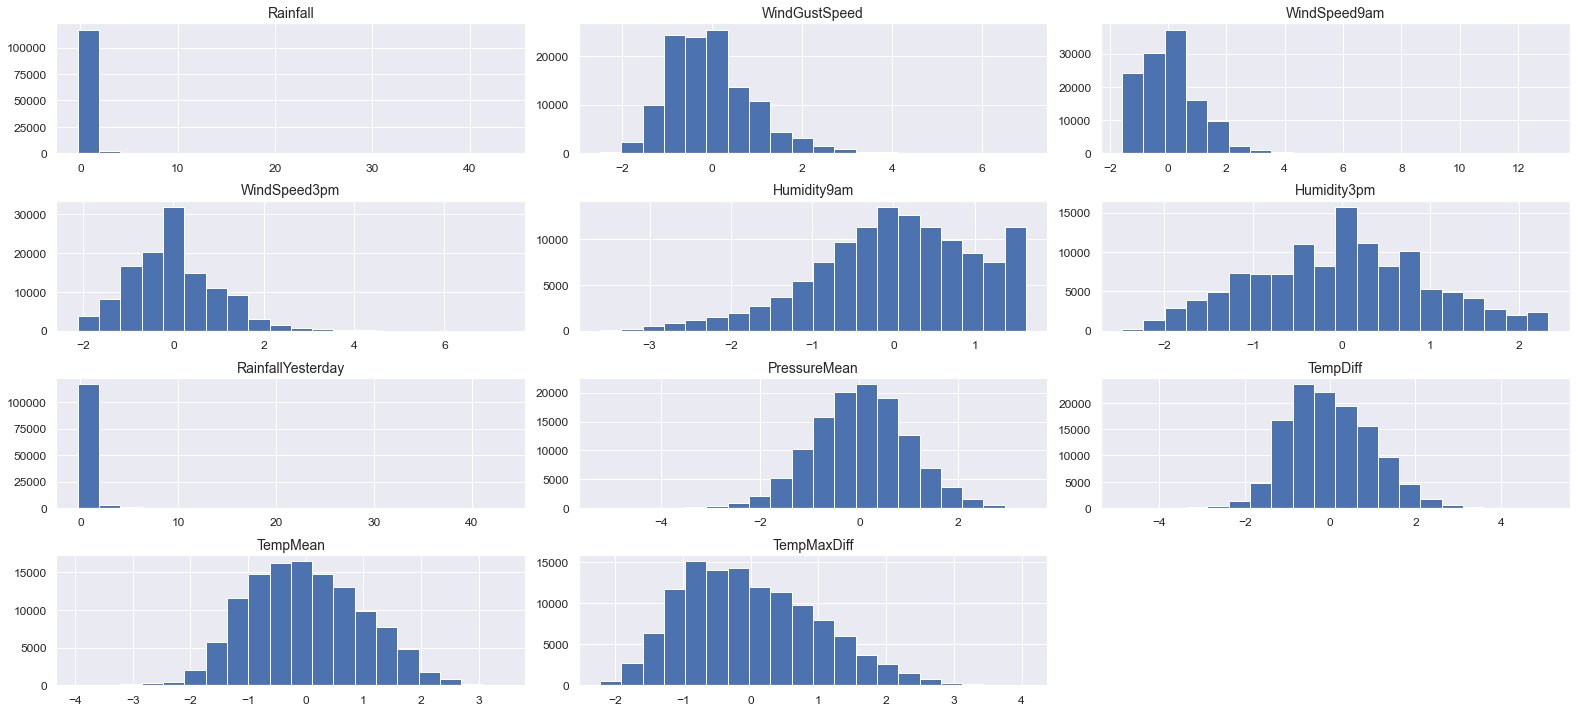

In [52]:
display_dataset_distributions(X_train[norm_col],bins=20)